In [1]:
# generate schema from given 
from pickle5 import pickle
from Schema import *
import networkx as nx
from ElementType import *
from groundtruth import *
from GraphGenerator import *
import matplotlib.pyplot as plt
from Evaluation import *
import random
from scipy.sparse.csgraph import connected_components
import pandas as pd
from utils import *
import seaborn as sns
from scipy.sparse import lil_matrix
import ged4py
# sc_topo = pickle.load(open('snb_gt_topological.pkl','rb',-1))

In [15]:
# sc_gen.computeF1score(sc_gt,CONSIDER_EDGES=True)
# sc_gen.mergeByLabelsSet(True)
sc_gen.computeF1score(sc_gt,CONSIDER_EDGES=True,WEIGHTED=False,ANALYSE_MODE=False,CONSIDER_EDGES_OF_SRC_TAR=True)
# len(sc_gen.nodetypeset), len(sc_gen.edgetypeset)
# sc_gen.nodetypeset[4].print(True)
# sc_gt.nodetypeset[9].print(True)
# sc_gen.nodetypeset[4].equal(sc_gt.nodetypeset[9],CONSIDER_EDGES=True)
# for i in list(sc_gen.nodetypeset[4].incoming_edges): #== sc_gt.nodetypeset[9].incoming_edges
#     print(i.toHashStr())
# print()
# for i in list(sc_gt.nodetypeset[9].incoming_edges): #== sc_gt.nodetypeset[9].incoming_edges
#     print(i.toHashStr())

computing node f1 score ignoredatatype False consider edges True
tp:  6 fn: 8 fp:  3
precision:  0.6666666666666666
recall:  0.42857142857142855
f1_score:  0.5217391304347826
tp:  11 fn: 9 fp:  7
precision:  0.6111111111111112
recall:  0.55
f1_score:  0.5789473684210527


In [2]:
# sc_gt = get_taxonomy()
sc_gt, sc = get_nolabel_SNB_gt()
k, theta = 3, 0.5
# G = get_taxonomy_data()
G, node2partition, edge2partition, node_partitions, \
    edge_partitions, node_partition_sim, edge_partition_sim,sc_gen =  \
    generateGraphFromSchema(sc_gt,l=0.2,p=0.2,rand_s=3,rand_t=8, edge_num=8,mode='attr_jaccard',theta=theta)
node_partitions, edge_partitions, node_partition_sim, edge_partition_sim = \
                        topoPartitionBased(G, k,[0.8/k]*k, node_partitions, edge_partitions, 
                                               node_partition_sim, edge_partition_sim, 
                                           node2partition, edge2partition,theta=theta,mode='else')
node2partition,edge2partition = getObject2PartitionDict(node_partitions), getObject2PartitionDict(edge_partitions)
topo_sck1 = GetSchemaFromGraphSplitEdgeType(G, node2partition,edge2partition)
remove_attr(topo_sck1)
n_p,n_r,n_f1,e_p,e_r,e_f1 = topo_sck1.computeF1score(sc_gt,CONSIDER_EDGES=True,
                            WEIGHTED=True,CONSIDER_EDGES_OF_SRC_TAR=True,PRINT=False)
# G_gen = getGraphFromSchema(topo_sck1)
# G_gen.nodes,G_gen.edges

78it [00:00, 2228.85it/s]
677it [00:00, 5641.89it/s]

rand_s 3 rand_t 8
merge node by  attr  theta: 0.5
4 clusters found out of 5 nodes
merge edge by  attr  theta:  0.5



  0%|          | 0/4 [00:00<?, ?it/s]


18 clusters found out of 22 nodes
compute node mode:  else


KeyError: 8

In [2]:
# n_p,n_r,n_f1,e_p,e_r,e_f1

In [23]:
# sc_gt, sc = get_nolabel_SNB_gt()
sc_gt = get_gt_northwind()
# sc = sc_gt
score_d = {}
n_f1_m = np.zeros((11,11))#{i*0.1+0.1:0 for i in range(10)}
e_f1_m = np.zeros((11,11))# {i*0.1+0.1:0 for i in range(10)}
para=0.5
for k in range(11):
#     para *= 0.1
#     k *= 3
    for theta in range(11):
        l = 0.5
        theta*=0.1
        G, node2partition, edge2partition, node_partitions, \
            edge_partitions, node_partition_sim, edge_partition_sim,sc_gen =  \
                            generateGraphFromSchema(sc,l=0.5,p=0.5,rand_s=3,rand_t=8, edge_num=3,mode='attr_jaccard',theta=theta)
        if l==0 and k!=0:
            node_partitions, edge_partitions, node_partition_sim, edge_partition_sim = \
                                topoPartitionBased(G, k,[1/k]*k)
#         elif l==1 and k!=0:
#             node_partitions, edge_partitions, node_partition_sim, edge_partition_sim = \
#                             topoPartitionBased(G, k,[(1-l)/k]*k, node_partitions, edge_partitions, 
#                                                node_partition_sim, edge_partition_sim, node2partition, edge2partition,theta=0.99)
        elif k!=0:#1-l!=0 and 
            node_partitions, edge_partitions, node_partition_sim, edge_partition_sim = \
                            topoPartitionBased(G, k,[(1-l)/k]*k, node_partitions, edge_partitions, 
                                               node_partition_sim, edge_partition_sim, node2partition, edge2partition,theta=theta)

        node2partition,edge2partition = getObject2PartitionDict(node_partitions), getObject2PartitionDict(edge_partitions)
        topo_sck1 = GetSchemaFromGraphSplitEdgeType(G, node2partition,edge2partition)
        remove_attr(topo_sck1)
        n_p,n_r,n_f1,e_p,e_r,e_f1 = topo_sck1.computeF1score(sc_gt,CONSIDER_EDGES=True,
                                    WEIGHTED=True,CONSIDER_EDGES_OF_SRC_TAR=True,PRINT=False)

        score_d[l] = [n_p,n_r,n_f1,e_p,e_r,e_f1]
        n_f1_m[k,int(theta*10)] = n_f1
        e_f1_m[k,int(theta*10)] = e_f1

66it [00:00, 4416.68it/s]
258it [00:00, 7166.81it/s]
66it [00:00, 8254.78it/s]
0it [00:00, ?it/s]

rand_s 3 rand_t 8
merge node by  attr
1 clusters found out of 5 nodes
merge edge by  attr
14 clusters found out of 22 nodes
computing node f1 score ignoredatatype False consider edges True
duplicate TP count:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
tp:  0 fn: 14 fp:  1
duplicate TP count:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
tp:  0 fn: 28 fp:  14
rand_s 3 rand_t 8


258it [00:00, 5380.33it/s]
66it [00:00, 7334.84it/s]
258it [00:00, 5863.78it/s]


merge node by  attr
1 clusters found out of 5 nodes
merge edge by  attr
14 clusters found out of 22 nodes
computing node f1 score ignoredatatype False consider edges True
duplicate TP count:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
tp:  0 fn: 14 fp:  1
duplicate TP count:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
tp:  0 fn: 28 fp:  14
rand_s 3 rand_t 8
merge node by  attr
1 clusters found out of 5 nodes
merge edge by  attr
14 clusters found out of 22 nodes

66it [00:00, 7338.53it/s]
258it [00:00, 5265.76it/s]
66it [00:00, 6603.63it/s]


computing node f1 score ignoredatatype False consider edges True
duplicate TP count:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
tp:  0 fn: 14 fp:  1
duplicate TP count:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
tp:  0 fn: 28 fp:  14
rand_s 3 rand_t 8
merge node by  attr
1 clusters found out of 5 nodes
merge edge by  attr
14 clusters found out of 22 nodes
computing node f1 score ignoredatatype False consider edges True
duplicate TP count:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
tp:  0 fn: 14 fp:  1
duplicate TP count:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
tp:  0 fn: 28 fp:  14
rand_s 3 rand_t 8



258it [00:00, 7417.85it/s]
66it [00:00, 4124.93it/s]
258it [00:00, 5059.17it/s]


merge node by  attr
4 clusters found out of 5 nodes
merge edge by  attr
18 clusters found out of 22 nodes
computing node f1 score ignoredatatype False consider edges True
duplicate TP count:  [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0]
tp:  2.0 fn: 12 fp:  2.0
duplicate TP count:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
tp:  0 fn: 28 fp:  18
rand_s 3 rand_t 8
merge node by  attr
4 clusters found out of 5 nodes
merge edge by  attr
18 clusters found out of 22 nodes


66it [00:00, 5077.57it/s]
258it [00:00, 5381.35it/s]

computing node f1 score ignoredatatype False consider edges True
duplicate TP count:  [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0]
tp:  2.0 fn: 12 fp:  2.0
duplicate TP count:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
tp:  0 fn: 28 fp:  18
rand_s 3 rand_t 8
merge node by  attr
4 clusters found out of 5 nodes
merge edge by  attr
18 clusters found out of 22 nodes



66it [00:00, 3299.41it/s]
258it [00:00, 4372.95it/s]

computing node f1 score ignoredatatype False consider edges True
duplicate TP count:  [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0]
tp:  2.0 fn: 12 fp:  2.0
duplicate TP count:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
tp:  0 fn: 28 fp:  18
rand_s 3 rand_t 8
merge node by  attr
4 clusters found out of 5 nodes
merge edge by  attr
18 clusters found out of 22 nodes



66it [00:00, 6004.47it/s]
258it [00:00, 4527.21it/s]
66it [00:00, 11015.24it/s]
0it [00:00, ?it/s]

computing node f1 score ignoredatatype False consider edges True
duplicate TP count:  [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0]
tp:  2.0 fn: 12 fp:  2.0
duplicate TP count:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
tp:  0 fn: 28 fp:  18
rand_s 3 rand_t 8
merge node by  attr
no node cluster found
merge edge by  attr
no edge cluster found
computing node f1 score ignoredatatype False consider edges True
duplicate TP count:  [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0]
tp:  3.0 fn: 11 fp:  2.0
duplicate TP count:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
tp:  0 fn: 28 fp:  22
rand_s 3 rand_t 8


258it [00:00, 6143.34it/s]
66it [00:00, 7331.73it/s]
258it [00:00, 5734.24it/s]


merge node by  attr
no node cluster found
merge edge by  attr
no edge cluster found
computing node f1 score ignoredatatype False consider edges True
duplicate TP count:  [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0]
tp:  3.0 fn: 11 fp:  2.0
duplicate TP count:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
tp:  0 fn: 28 fp:  22
rand_s 3 rand_t 8
merge node by  attr
no node cluster found
merge edge by  attr
no edge cluster found
computing node f1 score ignoredatatype False consider edges True
duplicate TP count:  [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0]
tp:  3.0 fn: 11 fp:  2.0
duplicate TP count:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
tp:  0 fn: 28 fp:  22
rand_s 3 rand_t 8


66it [00:00, 5491.02it/s]
258it [00:00, 6084.92it/s]
  0%|          | 0/1 [00:00<?, ?it/s]

merge node by  attr
1 clusters found out of 5 nodes
merge edge by  attr
14 clusters found out of 22 nodes


100%|██████████| 14/14 [00:00<00:00, 209.05it/s]
66it [00:00, 6000.17it/s]
258it [00:00, 6616.31it/s]
  0%|          | 0/1 [00:00<?, ?it/s]

computing node f1 score ignoredatatype False consider edges True
duplicate TP count:  [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0]
tp:  1.0 fn: 13 fp:  1.0
duplicate TP count:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
tp:  0 fn: 28 fp:  14
rand_s 3 rand_t 8
merge node by  attr
1 clusters found out of 5 nodes
merge edge by  attr
14 clusters found out of 22 nodes


100%|██████████| 14/14 [00:00<00:00, 212.16it/s]
66it [00:00, 5992.77it/s]
258it [00:00, 5859.93it/s]
  0%|          | 0/1 [00:00<?, ?it/s]

computing node f1 score ignoredatatype False consider edges True
duplicate TP count:  [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0]
tp:  1.0 fn: 13 fp:  1.0
duplicate TP count:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
tp:  0 fn: 28 fp:  14
rand_s 3 rand_t 8
merge node by  attr
1 clusters found out of 5 nodes
merge edge by  attr
14 clusters found out of 22 nodes


100%|██████████| 14/14 [00:00<00:00, 297.92it/s]
66it [00:00, 5997.06it/s]
258it [00:00, 7577.79it/s]
  0%|          | 0/1 [00:00<?, ?it/s]

computing node f1 score ignoredatatype False consider edges True
duplicate TP count:  [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0]
tp:  1.0 fn: 13 fp:  1.0
duplicate TP count:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
tp:  0 fn: 28 fp:  14
rand_s 3 rand_t 8
merge node by  attr
1 clusters found out of 5 nodes
merge edge by  attr
14 clusters found out of 22 nodes


100%|██████████| 14/14 [00:00<00:00, 280.01it/s]
66it [00:00, 5998.48it/s]
258it [00:00, 6449.97it/s]
  0%|          | 0/4 [00:00<?, ?it/s]

computing node f1 score ignoredatatype False consider edges True
duplicate TP count:  [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0]
tp:  1.0 fn: 13 fp:  2.0
duplicate TP count:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
tp:  0 fn: 28 fp:  16
rand_s 3 rand_t 8
merge node by  attr
4 clusters found out of 5 nodes
merge edge by  attr
18 clusters found out of 22 nodes


100%|██████████| 18/18 [00:00<00:00, 468.28it/s]
66it [00:00, 6598.59it/s]
258it [00:00, 6362.07it/s]
  0%|          | 0/4 [00:00<?, ?it/s]

computing node f1 score ignoredatatype False consider edges True
duplicate TP count:  [0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0]
tp:  3.0 fn: 11 fp:  2.0
duplicate TP count:  [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
tp:  1.0 fn: 27 fp:  17.0
rand_s 3 rand_t 8
merge node by  attr
4 clusters found out of 5 nodes
merge edge by  attr
18 clusters found out of 22 nodes


100%|██████████| 18/18 [00:00<00:00, 404.06it/s]
66it [00:00, 5961.80it/s]
258it [00:00, 3583.44it/s]

computing node f1 score ignoredatatype False consider edges True
duplicate TP count:  [0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0]
tp:  6.0 fn: 8 fp:  8.0
duplicate TP count:  [0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
tp:  4.0 fn: 24 fp:  30.0
rand_s 3 rand_t 8
merge node by  attr
4 clusters found out of 5 nodes
merge edge by  attr
18 clusters found out of 22 nodes



100%|██████████| 18/18 [00:00<00:00, 310.29it/s]
66it [00:00, 1319.93it/s]
0it [00:00, ?it/s]

computing node f1 score ignoredatatype False consider edges True
duplicate TP count:  [0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0]
tp:  6.0 fn: 8 fp:  8.0
duplicate TP count:  [0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
tp:  4.0 fn: 24 fp:  30.0
rand_s 3 rand_t 8


258it [00:00, 2744.71it/s]


merge node by  attr
4 clusters found out of 5 nodes
merge edge by  attr
18 clusters found out of 22 nodes


100%|██████████| 18/18 [00:00<00:00, 216.87it/s]
66it [00:00, 6000.56it/s]
258it [00:00, 7167.57it/s]
  0%|          | 0/5 [00:00<?, ?it/s]

computing node f1 score ignoredatatype False consider edges True
duplicate TP count:  [0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0]
tp:  8.0 fn: 6 fp:  9.0
duplicate TP count:  [0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
tp:  7.0 fn: 21 fp:  29.0
rand_s 3 rand_t 8
merge node by  attr
no node cluster found
merge edge by  attr
no edge cluster found


100%|██████████| 22/22 [00:00<00:00, 564.10it/s]
66it [00:00, 6602.84it/s]
258it [00:00, 9548.49it/s]
100%|██████████| 22/22 [00:00<00:00, 567.52it/s]

computing node f1 score ignoredatatype False consider edges True
duplicate TP count:  [0, 3, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0]
tp:  8.333333333333332 fn: 5 fp:  16.666666666666668
duplicate TP count:  [0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
tp:  9.0 fn: 19 fp:  83.0
rand_s 3 rand_t 8
merge node by  attr
no node cluster found
merge edge by  attr
no edge cluster found



66it [00:00, 5990.83it/s]
258it [00:00, 6782.69it/s]
  0%|          | 0/5 [00:00<?, ?it/s]

computing node f1 score ignoredatatype False consider edges True
duplicate TP count:  [0, 3, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0]
tp:  9.333333333333332 fn: 4 fp:  26.666666666666668
duplicate TP count:  [0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0]
tp:  16.0 fn: 12 fp:  125.0
rand_s 3 rand_t 8
merge node by  attr
no node cluster found
merge edge by  attr
no edge cluster found


100%|██████████| 22/22 [00:00<00:00, 578.51it/s]
66it [00:00, 7324.36it/s]
258it [00:00, 7567.19it/s]
  0%|          | 0/1 [00:00<?, ?it/s]

computing node f1 score ignoredatatype False consider edges True
duplicate TP count:  [0, 5, 2, 4, 0, 1, 4, 3, 4, 1, 5, 2, 0, 0]
tp:  4.483333333333334 fn: 4 fp:  40.516666666666666
duplicate TP count:  [0, 0, 1, 2, 1, 2, 7, 2, 6, 2, 1, 1, 3, 6, 6, 1, 0, 0, 1, 3, 0, 0, 0, 0, 0, 0, 0, 0]
tp:  9.30952380952381 fn: 12 fp:  179.6904761904762
rand_s 3 rand_t 8
merge node by  attr
1 clusters found out of 5 nodes
merge edge by  attr
14 clusters found out of 22 nodes


100%|██████████| 14/14 [00:00<00:00, 304.94it/s]
66it [00:00, 6595.29it/s]
258it [00:00, 6449.35it/s]
  0%|          | 0/1 [00:00<?, ?it/s]

computing node f1 score ignoredatatype False consider edges True
duplicate TP count:  [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0]
tp:  1.0 fn: 13 fp:  1.0
duplicate TP count:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
tp:  0 fn: 28 fp:  14
rand_s 3 rand_t 8
merge node by  attr
1 clusters found out of 5 nodes
merge edge by  attr
14 clusters found out of 22 nodes


100%|██████████| 14/14 [00:00<00:00, 326.50it/s]
66it [00:00, 7335.23it/s]
258it [00:00, 6599.81it/s]
  0%|          | 0/1 [00:00<?, ?it/s]

computing node f1 score ignoredatatype False consider edges True
duplicate TP count:  [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0]
tp:  1.0 fn: 13 fp:  1.0
duplicate TP count:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
tp:  0 fn: 28 fp:  14
rand_s 3 rand_t 8
merge node by  attr
1 clusters found out of 5 nodes
merge edge by  attr
14 clusters found out of 22 nodes


100%|██████████| 14/14 [00:00<00:00, 254.38it/s]
66it [00:00, 9428.29it/s]
258it [00:00, 7167.19it/s]
  0%|          | 0/1 [00:00<?, ?it/s]

computing node f1 score ignoredatatype False consider edges True
duplicate TP count:  [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0]
tp:  1.0 fn: 13 fp:  1.0
duplicate TP count:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
tp:  0 fn: 28 fp:  14
rand_s 3 rand_t 8
merge node by  attr
1 clusters found out of 5 nodes
merge edge by  attr
14 clusters found out of 22 nodes


100%|██████████| 14/14 [00:00<00:00, 310.99it/s]
66it [00:00, 5071.90it/s]
258it [00:00, 7810.62it/s]
  0%|          | 0/4 [00:00<?, ?it/s]

computing node f1 score ignoredatatype False consider edges True
duplicate TP count:  [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0]
tp:  1.0 fn: 13 fp:  2.0
duplicate TP count:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
tp:  0 fn: 28 fp:  16
rand_s 3 rand_t 8
merge node by  attr
4 clusters found out of 5 nodes
merge edge by  attr
18 clusters found out of 22 nodes


100%|██████████| 18/18 [00:00<00:00, 400.04it/s]
66it [00:00, 8230.97it/s]
258it [00:00, 6446.32it/s]
100%|██████████| 4/4 [00:00<00:00, 56.24it/s]

computing node f1 score ignoredatatype False consider edges True
duplicate TP count:  [0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0]
tp:  3.0 fn: 11 fp:  2.0
duplicate TP count:  [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
tp:  1.0 fn: 27 fp:  17.0
rand_s 3 rand_t 8
merge node by  attr
4 clusters found out of 5 nodes
merge edge by  attr
18 clusters found out of 22 nodes



100%|██████████| 18/18 [00:00<00:00, 393.70it/s]
66it [00:00, 10952.49it/s]
258it [00:00, 6611.30it/s]
100%|██████████| 4/4 [00:00<00:00, 48.36it/s]

computing node f1 score ignoredatatype False consider edges True
duplicate TP count:  [0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0]
tp:  6.0 fn: 8 fp:  8.0
duplicate TP count:  [0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
tp:  4.0 fn: 24 fp:  30.0
rand_s 3 rand_t 8
merge node by  attr
4 clusters found out of 5 nodes
merge edge by  attr
18 clusters found out of 22 nodes



100%|██████████| 18/18 [00:00<00:00, 449.80it/s]
66it [00:00, 7331.15it/s]
258it [00:00, 6761.92it/s]
  0%|          | 0/4 [00:00<?, ?it/s]

computing node f1 score ignoredatatype False consider edges True
duplicate TP count:  [0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0]
tp:  6.0 fn: 8 fp:  8.0
duplicate TP count:  [0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
tp:  4.0 fn: 24 fp:  30.0
rand_s 3 rand_t 8
merge node by  attr
4 clusters found out of 5 nodes
merge edge by  attr
18 clusters found out of 22 nodes


100%|██████████| 18/18 [00:00<00:00, 416.89it/s]
66it [00:00, 3668.88it/s]
258it [00:00, 4229.15it/s]

computing node f1 score ignoredatatype False consider edges True
duplicate TP count:  [0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0]
tp:  8.0 fn: 6 fp:  9.0
duplicate TP count:  [0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
tp:  7.0 fn: 21 fp:  29.0
rand_s 3 rand_t 8
merge node by  attr
no node cluster found
merge edge by  attr
no edge cluster found



100%|██████████| 22/22 [00:00<00:00, 579.27it/s]
66it [00:00, 5995.24it/s]
258it [00:00, 6267.23it/s]
  0%|          | 0/5 [00:00<?, ?it/s]

computing node f1 score ignoredatatype False consider edges True
duplicate TP count:  [0, 3, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0]
tp:  8.333333333333332 fn: 5 fp:  16.666666666666668
duplicate TP count:  [0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
tp:  9.0 fn: 19 fp:  83.0
rand_s 3 rand_t 8
merge node by  attr
no node cluster found
merge edge by  attr
no edge cluster found


100%|██████████| 22/22 [00:00<00:00, 427.57it/s]
66it [00:00, 5077.20it/s]
258it [00:00, 5265.84it/s]
  0%|          | 0/5 [00:00<?, ?it/s]

computing node f1 score ignoredatatype False consider edges True
duplicate TP count:  [0, 3, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0]
tp:  9.333333333333332 fn: 4 fp:  26.666666666666668
duplicate TP count:  [0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0]
tp:  16.0 fn: 12 fp:  125.0
rand_s 3 rand_t 8
merge node by  attr
no node cluster found
merge edge by  attr
no edge cluster found


100%|██████████| 22/22 [00:00<00:00, 157.15it/s]
66it [00:00, 6604.10it/s]
258it [00:00, 6441.29it/s]

computing node f1 score ignoredatatype False consider edges True
duplicate TP count:  [0, 5, 2, 4, 0, 1, 4, 3, 4, 1, 5, 2, 0, 0]
tp:  4.483333333333334 fn: 4 fp:  40.516666666666666
duplicate TP count:  [0, 0, 1, 2, 1, 2, 7, 2, 6, 2, 1, 1, 3, 6, 6, 1, 0, 0, 1, 3, 0, 0, 0, 0, 0, 0, 0, 0]
tp:  9.30952380952381 fn: 12 fp:  179.6904761904762
rand_s 3 rand_t 8
merge node by  attr
1 clusters found out of 5 nodes
merge edge by  attr



  0%|          | 0/1 [00:00<?, ?it/s]

14 clusters found out of 22 nodes


100%|██████████| 14/14 [00:00<00:00, 152.17it/s]
66it [00:00, 6603.00it/s]
258it [00:00, 4691.62it/s]
  0%|          | 0/1 [00:00<?, ?it/s]

computing node f1 score ignoredatatype False consider edges True
duplicate TP count:  [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0]
tp:  1.0 fn: 13 fp:  1.0
duplicate TP count:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
tp:  0 fn: 28 fp:  14
rand_s 3 rand_t 8
merge node by  attr
1 clusters found out of 5 nodes
merge edge by  attr
14 clusters found out of 22 nodes


100%|██████████| 14/14 [00:00<00:00, 130.84it/s]
66it [00:00, 5499.42it/s]
258it [00:00, 5160.28it/s]
  0%|          | 0/1 [00:00<?, ?it/s]

computing node f1 score ignoredatatype False consider edges True
duplicate TP count:  [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0]
tp:  1.0 fn: 13 fp:  1.0
duplicate TP count:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
tp:  0 fn: 28 fp:  14
rand_s 3 rand_t 8
merge node by  attr
1 clusters found out of 5 nodes
merge edge by  attr
14 clusters found out of 22 nodes


100%|██████████| 14/14 [00:00<00:00, 164.71it/s]
66it [00:00, 3696.16it/s]
258it [00:00, 6143.20it/s]


computing node f1 score ignoredatatype False consider edges True
duplicate TP count:  [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0]
tp:  1.0 fn: 13 fp:  1.0
duplicate TP count:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
tp:  0 fn: 28 fp:  14
rand_s 3 rand_t 8
merge node by  attr
1 clusters found out of 5 nodes
merge edge by  attr
14 clusters found out of 22 nodes


100%|██████████| 14/14 [00:00<00:00, 350.03it/s]
66it [00:00, 9430.86it/s]
258it [00:00, 9215.82it/s]
  0%|          | 0/4 [00:00<?, ?it/s]

computing node f1 score ignoredatatype False consider edges True
duplicate TP count:  [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0]
tp:  1.0 fn: 13 fp:  2.0
duplicate TP count:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
tp:  0 fn: 28 fp:  16
rand_s 3 rand_t 8
merge node by  attr
4 clusters found out of 5 nodes
merge edge by  attr
18 clusters found out of 22 nodes


100%|██████████| 18/18 [00:00<00:00, 548.79it/s]
66it [00:00, 6001.61it/s]
258it [00:00, 6042.62it/s]
  0%|          | 0/4 [00:00<?, ?it/s]

computing node f1 score ignoredatatype False consider edges True
duplicate TP count:  [0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0]
tp:  3.0 fn: 11 fp:  2.0
duplicate TP count:  [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
tp:  1.0 fn: 27 fp:  17.0
rand_s 3 rand_t 8
merge node by  attr
4 clusters found out of 5 nodes
merge edge by  attr
18 clusters found out of 22 nodes


100%|██████████| 18/18 [00:00<00:00, 211.81it/s]
66it [00:00, 8253.80it/s]
258it [00:00, 6445.17it/s]
  0%|          | 0/4 [00:00<?, ?it/s]

computing node f1 score ignoredatatype False consider edges True
duplicate TP count:  [0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0]
tp:  6.0 fn: 8 fp:  8.0
duplicate TP count:  [0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
tp:  4.0 fn: 24 fp:  30.0
rand_s 3 rand_t 8
merge node by  attr
4 clusters found out of 5 nodes
merge edge by  attr
18 clusters found out of 22 nodes


100%|██████████| 18/18 [00:00<00:00, 268.03it/s]
66it [00:00, 4969.29it/s]
258it [00:00, 7152.22it/s]
  0%|          | 0/4 [00:00<?, ?it/s]

computing node f1 score ignoredatatype False consider edges True
duplicate TP count:  [0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0]
tp:  6.0 fn: 8 fp:  8.0
duplicate TP count:  [0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
tp:  4.0 fn: 24 fp:  30.0
rand_s 3 rand_t 8
merge node by  attr
4 clusters found out of 5 nodes
merge edge by  attr
18 clusters found out of 22 nodes


100%|██████████| 18/18 [00:00<00:00, 528.79it/s]
66it [00:00, 11007.36it/s]
258it [00:00, 8025.05it/s]
  0%|          | 0/22 [00:00<?, ?it/s]

computing node f1 score ignoredatatype False consider edges True
duplicate TP count:  [0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0]
tp:  8.0 fn: 6 fp:  9.0
duplicate TP count:  [0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
tp:  7.0 fn: 21 fp:  29.0
rand_s 3 rand_t 8
merge node by  attr
no node cluster found
merge edge by  attr
no edge cluster found


100%|██████████| 22/22 [00:00<00:00, 594.31it/s]
66it [00:00, 11012.61it/s]
258it [00:00, 9559.88it/s]
  0%|          | 0/22 [00:00<?, ?it/s]

computing node f1 score ignoredatatype False consider edges True
duplicate TP count:  [0, 3, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0]
tp:  8.333333333333332 fn: 5 fp:  16.666666666666668
duplicate TP count:  [0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
tp:  9.0 fn: 19 fp:  83.0
rand_s 3 rand_t 8
merge node by  attr
no node cluster found
merge edge by  attr
no edge cluster found


100%|██████████| 22/22 [00:00<00:00, 608.72it/s]
66it [00:00, 7335.42it/s]
258it [00:00, 7176.07it/s]
  0%|          | 0/5 [00:00<?, ?it/s]

computing node f1 score ignoredatatype False consider edges True
duplicate TP count:  [0, 3, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0]
tp:  9.333333333333332 fn: 4 fp:  26.666666666666668
duplicate TP count:  [0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0]
tp:  16.0 fn: 12 fp:  125.0
rand_s 3 rand_t 8
merge node by  attr
no node cluster found
merge edge by  attr
no edge cluster found


100%|██████████| 71/71 [00:00<00:00, 1080.64it/s]
66it [00:00, 6599.22it/s]
258it [00:00, 7163.30it/s]
  0%|          | 0/1 [00:00<?, ?it/s]

computing node f1 score ignoredatatype False consider edges True
duplicate TP count:  [0, 5, 2, 4, 0, 1, 4, 3, 4, 1, 5, 2, 0, 0]
tp:  4.483333333333334 fn: 4 fp:  40.516666666666666
duplicate TP count:  [0, 0, 1, 2, 1, 2, 7, 2, 6, 2, 1, 1, 3, 6, 6, 1, 0, 0, 1, 3, 0, 0, 0, 0, 0, 0, 0, 0]
tp:  9.30952380952381 fn: 12 fp:  179.6904761904762
rand_s 3 rand_t 8
merge node by  attr
1 clusters found out of 5 nodes
merge edge by  attr
14 clusters found out of 22 nodes


100%|██████████| 14/14 [00:00<00:00, 304.27it/s]
66it [00:00, 6646.91it/s]
258it [00:00, 8911.63it/s]
  0%|          | 0/1 [00:00<?, ?it/s]

computing node f1 score ignoredatatype False consider edges True
duplicate TP count:  [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0]
tp:  1.0 fn: 13 fp:  1.0
duplicate TP count:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
tp:  0 fn: 28 fp:  14
rand_s 3 rand_t 8
merge node by  attr
1 clusters found out of 5 nodes
merge edge by  attr
14 clusters found out of 22 nodes


100%|██████████| 14/14 [00:00<00:00, 306.01it/s]
66it [00:00, 9463.42it/s]
258it [00:00, 2997.90it/s]


computing node f1 score ignoredatatype False consider edges True
duplicate TP count:  [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0]
tp:  1.0 fn: 13 fp:  1.0
duplicate TP count:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
tp:  0 fn: 28 fp:  14
rand_s 3 rand_t 8
merge node by  attr
1 clusters found out of 5 nodes
merge edge by  attr
14 clusters found out of 22 nodes


100%|██████████| 14/14 [00:00<00:00, 297.91it/s]
66it [00:00, 9424.44it/s]
258it [00:00, 10311.21it/s]
  0%|          | 0/1 [00:00<?, ?it/s]

computing node f1 score ignoredatatype False consider edges True
duplicate TP count:  [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0]
tp:  1.0 fn: 13 fp:  1.0
duplicate TP count:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
tp:  0 fn: 28 fp:  14
rand_s 3 rand_t 8
merge node by  attr
1 clusters found out of 5 nodes
merge edge by  attr
14 clusters found out of 22 nodes


100%|██████████| 14/14 [00:00<00:00, 377.30it/s]
66it [00:00, 8179.41it/s]
258it [00:00, 6779.33it/s]
100%|██████████| 4/4 [00:00<00:00, 54.04it/s]

computing node f1 score ignoredatatype False consider edges True
duplicate TP count:  [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0]
tp:  1.0 fn: 13 fp:  2.0
duplicate TP count:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
tp:  0 fn: 28 fp:  16
rand_s 3 rand_t 8
merge node by  attr
4 clusters found out of 5 nodes
merge edge by  attr
18 clusters found out of 22 nodes



100%|██████████| 18/18 [00:00<00:00, 529.45it/s]
66it [00:00, 7339.89it/s]
258it [00:00, 8600.49it/s]
  0%|          | 0/18 [00:00<?, ?it/s]

computing node f1 score ignoredatatype False consider edges True
duplicate TP count:  [0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0]
tp:  3.0 fn: 11 fp:  2.0
duplicate TP count:  [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
tp:  1.0 fn: 27 fp:  17.0
rand_s 3 rand_t 8
merge node by  attr
4 clusters found out of 5 nodes
merge edge by  attr
18 clusters found out of 22 nodes


100%|██████████| 18/18 [00:00<00:00, 529.46it/s]
66it [00:00, 9437.61it/s]
258it [00:00, 8049.47it/s]
100%|██████████| 4/4 [00:00<00:00, 53.89it/s]

computing node f1 score ignoredatatype False consider edges True
duplicate TP count:  [0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0]
tp:  6.0 fn: 8 fp:  8.0
duplicate TP count:  [0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
tp:  4.0 fn: 24 fp:  30.0
rand_s 3 rand_t 8
merge node by  attr
4 clusters found out of 5 nodes
merge edge by  attr
18 clusters found out of 22 nodes



100%|██████████| 18/18 [00:00<00:00, 545.44it/s]
66it [00:00, 9434.72it/s]
258it [00:00, 8031.96it/s]
100%|██████████| 4/4 [00:00<00:00, 53.32it/s]

computing node f1 score ignoredatatype False consider edges True
duplicate TP count:  [0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0]
tp:  6.0 fn: 8 fp:  8.0
duplicate TP count:  [0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
tp:  4.0 fn: 24 fp:  30.0
rand_s 3 rand_t 8
merge node by  attr
4 clusters found out of 5 nodes
merge edge by  attr
18 clusters found out of 22 nodes



100%|██████████| 18/18 [00:00<00:00, 545.60it/s]
66it [00:00, 8231.22it/s]
258it [00:00, 2799.34it/s]
  0%|          | 0/5 [00:00<?, ?it/s]

computing node f1 score ignoredatatype False consider edges True
duplicate TP count:  [0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0]
tp:  8.0 fn: 6 fp:  9.0
duplicate TP count:  [0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
tp:  7.0 fn: 21 fp:  29.0
rand_s 3 rand_t 8
merge node by  attr
no node cluster found
merge edge by  attr
no edge cluster found


100%|██████████| 22/22 [00:00<00:00, 663.81it/s]
66it [00:00, 10877.17it/s]
258it [00:00, 7563.06it/s]
100%|██████████| 22/22 [00:00<00:00, 687.17it/s]

computing node f1 score ignoredatatype False consider edges True
duplicate TP count:  [0, 3, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0]
tp:  8.333333333333332 fn: 5 fp:  16.666666666666668
duplicate TP count:  [0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
tp:  9.0 fn: 19 fp:  83.0
rand_s 3 rand_t 8
merge node by  attr
no node cluster found
merge edge by  attr
no edge cluster found



100%|██████████| 22/22 [00:00<00:00, 686.94it/s]
66it [00:00, 8252.07it/s]
258it [00:00, 7371.41it/s]
100%|██████████| 5/5 [00:00<00:00, 72.46it/s]

computing node f1 score ignoredatatype False consider edges True
duplicate TP count:  [0, 3, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0]
tp:  9.333333333333332 fn: 4 fp:  26.666666666666668
duplicate TP count:  [0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0]
tp:  16.0 fn: 12 fp:  125.0
rand_s 3 rand_t 8
merge node by  attr
no node cluster found
merge edge by  attr
no edge cluster found



100%|██████████| 71/71 [00:00<00:00, 1245.65it/s]
66it [00:00, 10954.65it/s]
258it [00:00, 9226.27it/s]
  0%|          | 0/1 [00:00<?, ?it/s]

computing node f1 score ignoredatatype False consider edges True
duplicate TP count:  [0, 5, 2, 4, 0, 1, 4, 3, 4, 1, 5, 2, 0, 0]
tp:  4.483333333333334 fn: 4 fp:  40.516666666666666
duplicate TP count:  [0, 0, 1, 2, 1, 2, 7, 2, 6, 2, 1, 1, 3, 6, 6, 1, 0, 0, 1, 3, 0, 0, 0, 0, 0, 0, 0, 0]
tp:  9.30952380952381 fn: 12 fp:  179.6904761904762
rand_s 3 rand_t 8
merge node by  attr
1 clusters found out of 5 nodes
merge edge by  attr
14 clusters found out of 22 nodes


100%|██████████| 14/14 [00:00<00:00, 348.62it/s]
66it [00:00, 7331.34it/s]
258it [00:00, 8323.31it/s]
  0%|          | 0/1 [00:00<?, ?it/s]

computing node f1 score ignoredatatype False consider edges True
duplicate TP count:  [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0]
tp:  1.0 fn: 13 fp:  1.0
duplicate TP count:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
tp:  0 fn: 28 fp:  14
rand_s 3 rand_t 8
merge node by  attr
1 clusters found out of 5 nodes
merge edge by  attr
14 clusters found out of 22 nodes


100%|██████████| 14/14 [00:00<00:00, 341.48it/s]
66it [00:00, 6600.16it/s]
258it [00:00, 9215.58it/s]
  0%|          | 0/1 [00:00<?, ?it/s]

computing node f1 score ignoredatatype False consider edges True
duplicate TP count:  [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0]
tp:  1.0 fn: 13 fp:  1.0
duplicate TP count:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
tp:  0 fn: 28 fp:  14
rand_s 3 rand_t 8
merge node by  attr
1 clusters found out of 5 nodes
merge edge by  attr
14 clusters found out of 22 nodes


100%|██████████| 14/14 [00:00<00:00, 321.65it/s]
66it [00:00, 7338.92it/s]
258it [00:00, 9556.00it/s]
  0%|          | 0/1 [00:00<?, ?it/s]

computing node f1 score ignoredatatype False consider edges True
duplicate TP count:  [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0]
tp:  1.0 fn: 13 fp:  1.0
duplicate TP count:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
tp:  0 fn: 28 fp:  14
rand_s 3 rand_t 8
merge node by  attr
1 clusters found out of 5 nodes
merge edge by  attr
14 clusters found out of 22 nodes


100%|██████████| 14/14 [00:00<00:00, 311.14it/s]
66it [00:00, 7332.70it/s]
258it [00:00, 7166.81it/s]
  0%|          | 0/4 [00:00<?, ?it/s]

computing node f1 score ignoredatatype False consider edges True
duplicate TP count:  [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0]
tp:  1.0 fn: 13 fp:  2.0
duplicate TP count:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
tp:  0 fn: 28 fp:  16
rand_s 3 rand_t 8
merge node by  attr
4 clusters found out of 5 nodes
merge edge by  attr
18 clusters found out of 22 nodes


100%|██████████| 18/18 [00:00<00:00, 617.48it/s]
66it [00:00, 8239.06it/s]
258it [00:00, 11214.72it/s]
100%|██████████| 4/4 [00:00<00:00, 56.49it/s]

computing node f1 score ignoredatatype False consider edges True
duplicate TP count:  [0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0]
tp:  3.0 fn: 11 fp:  2.0
duplicate TP count:  [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
tp:  1.0 fn: 27 fp:  17.0
rand_s 3 rand_t 8
merge node by  attr
4 clusters found out of 5 nodes
merge edge by  attr
18 clusters found out of 22 nodes



100%|██████████| 18/18 [00:00<00:00, 486.51it/s]
66it [00:00, 9421.23it/s]
258it [00:00, 9552.96it/s]
  0%|          | 0/18 [00:00<?, ?it/s]

computing node f1 score ignoredatatype False consider edges True
duplicate TP count:  [0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0]
tp:  6.0 fn: 8 fp:  8.0
duplicate TP count:  [0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
tp:  4.0 fn: 24 fp:  30.0
rand_s 3 rand_t 8
merge node by  attr
4 clusters found out of 5 nodes
merge edge by  attr
18 clusters found out of 22 nodes


100%|██████████| 18/18 [00:00<00:00, 439.03it/s]
66it [00:00, 7330.37it/s]
258it [00:00, 6591.12it/s]
  0%|          | 0/18 [00:00<?, ?it/s]

computing node f1 score ignoredatatype False consider edges True
duplicate TP count:  [0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0]
tp:  6.0 fn: 8 fp:  8.0
duplicate TP count:  [0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
tp:  4.0 fn: 24 fp:  30.0
rand_s 3 rand_t 8
merge node by  attr
4 clusters found out of 5 nodes
merge edge by  attr
18 clusters found out of 22 nodes


100%|██████████| 18/18 [00:00<00:00, 367.23it/s]
66it [00:00, 8253.55it/s]
258it [00:00, 8874.87it/s]
100%|██████████| 5/5 [00:00<00:00, 67.85it/s]

computing node f1 score ignoredatatype False consider edges True
duplicate TP count:  [0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0]
tp:  8.0 fn: 6 fp:  9.0
duplicate TP count:  [0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
tp:  7.0 fn: 21 fp:  29.0
rand_s 3 rand_t 8
merge node by  attr
no node cluster found
merge edge by  attr
no edge cluster found



100%|██████████| 22/22 [00:00<00:00, 666.72it/s]
66it [00:00, 8247.40it/s]
258it [00:00, 7165.10it/s]
  0%|          | 0/22 [00:00<?, ?it/s]

computing node f1 score ignoredatatype False consider edges True
duplicate TP count:  [0, 3, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0]
tp:  8.333333333333332 fn: 5 fp:  16.666666666666668
duplicate TP count:  [0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
tp:  9.0 fn: 19 fp:  83.0
rand_s 3 rand_t 8
merge node by  attr
no node cluster found
merge edge by  attr
no edge cluster found


100%|██████████| 22/22 [00:00<00:00, 628.90it/s]
66it [00:00, 9450.82it/s]
258it [00:00, 7585.38it/s]
  0%|          | 0/22 [00:00<?, ?it/s]

computing node f1 score ignoredatatype False consider edges True
duplicate TP count:  [0, 3, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0]
tp:  9.333333333333332 fn: 4 fp:  26.666666666666668
duplicate TP count:  [0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0]
tp:  16.0 fn: 12 fp:  125.0
rand_s 3 rand_t 8
merge node by  attr
no node cluster found
merge edge by  attr
no edge cluster found


100%|██████████| 72/72 [00:00<00:00, 1285.88it/s]
66it [00:00, 8254.78it/s]
258it [00:00, 8819.39it/s]
  0%|          | 0/1 [00:00<?, ?it/s]

computing node f1 score ignoredatatype False consider edges True
duplicate TP count:  [0, 5, 2, 4, 0, 1, 4, 3, 4, 1, 5, 2, 0, 0]
tp:  4.483333333333334 fn: 4 fp:  40.516666666666666
duplicate TP count:  [0, 0, 1, 2, 1, 2, 7, 2, 6, 2, 1, 1, 3, 6, 6, 1, 0, 0, 1, 3, 0, 0, 0, 0, 0, 0, 0, 0]
tp:  9.30952380952381 fn: 12 fp:  179.6904761904762
rand_s 3 rand_t 8
merge node by  attr
1 clusters found out of 5 nodes
merge edge by  attr
14 clusters found out of 22 nodes


100%|██████████| 14/14 [00:00<00:00, 254.41it/s]
66it [00:00, 8232.93it/s]
258it [00:00, 8060.86it/s]
  0%|          | 0/1 [00:00<?, ?it/s]

computing node f1 score ignoredatatype False consider edges True
duplicate TP count:  [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0]
tp:  1.0 fn: 13 fp:  1.0
duplicate TP count:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
tp:  0 fn: 28 fp:  14
rand_s 3 rand_t 8
merge node by  attr
1 clusters found out of 5 nodes
merge edge by  attr
14 clusters found out of 22 nodes


100%|██████████| 14/14 [00:00<00:00, 310.23it/s]
66it [00:00, 7332.70it/s]
258it [00:00, 9557.51it/s]
  0%|          | 0/1 [00:00<?, ?it/s]

computing node f1 score ignoredatatype False consider edges True
duplicate TP count:  [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0]
tp:  1.0 fn: 13 fp:  1.0
duplicate TP count:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
tp:  0 fn: 28 fp:  14
rand_s 3 rand_t 8
merge node by  attr
1 clusters found out of 5 nodes
merge edge by  attr
14 clusters found out of 22 nodes


100%|██████████| 14/14 [00:00<00:00, 304.05it/s]
66it [00:00, 8235.87it/s]
258it [00:00, 7811.98it/s]
  0%|          | 0/1 [00:00<?, ?it/s]

computing node f1 score ignoredatatype False consider edges True
duplicate TP count:  [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0]
tp:  1.0 fn: 13 fp:  1.0
duplicate TP count:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
tp:  0 fn: 28 fp:  14
rand_s 3 rand_t 8
merge node by  attr
1 clusters found out of 5 nodes
merge edge by  attr
14 clusters found out of 22 nodes


100%|██████████| 14/14 [00:00<00:00, 359.01it/s]
66it [00:00, 8250.35it/s]
258it [00:00, 8594.20it/s]
  0%|          | 0/4 [00:00<?, ?it/s]

computing node f1 score ignoredatatype False consider edges True
duplicate TP count:  [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0]
tp:  1.0 fn: 13 fp:  2.0
duplicate TP count:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
tp:  0 fn: 28 fp:  16
rand_s 3 rand_t 8
merge node by  attr
4 clusters found out of 5 nodes
merge edge by  attr
18 clusters found out of 22 nodes


100%|██████████| 18/18 [00:00<00:00, 644.04it/s]
66it [00:00, 9428.29it/s]
258it [00:00, 7167.66it/s]
  0%|          | 0/18 [00:00<?, ?it/s]

computing node f1 score ignoredatatype False consider edges True
duplicate TP count:  [0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0]
tp:  3.0 fn: 11 fp:  2.0
duplicate TP count:  [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
tp:  1.0 fn: 27 fp:  17.0
rand_s 3 rand_t 8
merge node by  attr
4 clusters found out of 5 nodes
merge edge by  attr
18 clusters found out of 22 nodes


100%|██████████| 18/18 [00:00<00:00, 598.64it/s]
66it [00:00, 10982.03it/s]
258it [00:00, 8895.81it/s]
100%|██████████| 4/4 [00:00<00:00, 51.90it/s]

computing node f1 score ignoredatatype False consider edges True
duplicate TP count:  [0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0]
tp:  6.0 fn: 8 fp:  8.0
duplicate TP count:  [0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
tp:  4.0 fn: 24 fp:  30.0
rand_s 3 rand_t 8
merge node by  attr
4 clusters found out of 5 nodes
merge edge by  attr
18 clusters found out of 22 nodes



100%|██████████| 18/18 [00:00<00:00, 545.52it/s]
66it [00:00, 9406.83it/s]
258it [00:00, 8893.69it/s]
100%|██████████| 4/4 [00:00<00:00, 51.32it/s]


computing node f1 score ignoredatatype False consider edges True
duplicate TP count:  [0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0]
tp:  6.0 fn: 8 fp:  8.0
duplicate TP count:  [0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
tp:  4.0 fn: 24 fp:  30.0
rand_s 3 rand_t 8
merge node by  attr
4 clusters found out of 5 nodes
merge edge by  attr
18 clusters found out of 22 nodes


100%|██████████| 18/18 [00:00<00:00, 620.78it/s]
66it [00:00, 6633.85it/s]
258it [00:00, 8320.30it/s]
  0%|          | 0/22 [00:00<?, ?it/s]

computing node f1 score ignoredatatype False consider edges True
duplicate TP count:  [0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0]
tp:  8.0 fn: 6 fp:  9.0
duplicate TP count:  [0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
tp:  7.0 fn: 21 fp:  29.0
rand_s 3 rand_t 8
merge node by  attr
no node cluster found
merge edge by  attr
no edge cluster found


100%|██████████| 22/22 [00:00<00:00, 609.60it/s]
66it [00:00, 8204.14it/s]
258it [00:00, 9541.92it/s]
100%|██████████| 22/22 [00:00<00:00, 757.93it/s]

computing node f1 score ignoredatatype False consider edges True
duplicate TP count:  [0, 3, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0]
tp:  8.333333333333332 fn: 5 fp:  16.666666666666668
duplicate TP count:  [0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
tp:  9.0 fn: 19 fp:  83.0
rand_s 3 rand_t 8
merge node by  attr
no node cluster found
merge edge by  attr
no edge cluster found



100%|██████████| 22/22 [00:00<00:00, 642.36it/s]
66it [00:00, 5085.78it/s]
258it [00:00, 9570.45it/s]
100%|██████████| 22/22 [00:00<00:00, 611.14it/s]

computing node f1 score ignoredatatype False consider edges True
duplicate TP count:  [0, 3, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0]
tp:  9.333333333333332 fn: 4 fp:  26.666666666666668
duplicate TP count:  [0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0]
tp:  16.0 fn: 12 fp:  125.0
rand_s 3 rand_t 8
merge node by  attr
no node cluster found
merge edge by  attr
no edge cluster found



100%|██████████| 74/74 [00:00<00:00, 1156.16it/s]
66it [00:00, 6600.16it/s]
258it [00:00, 9214.48it/s]
  0%|          | 0/1 [00:00<?, ?it/s]

computing node f1 score ignoredatatype False consider edges True
duplicate TP count:  [0, 5, 2, 4, 0, 1, 4, 3, 4, 1, 5, 2, 0, 0]
tp:  4.483333333333334 fn: 4 fp:  40.516666666666666
duplicate TP count:  [0, 0, 1, 2, 1, 2, 7, 2, 6, 2, 1, 1, 3, 6, 6, 1, 0, 0, 1, 3, 0, 0, 0, 0, 0, 0, 0, 0]
tp:  9.30952380952381 fn: 12 fp:  179.6904761904762
rand_s 3 rand_t 8
merge node by  attr
1 clusters found out of 5 nodes
merge edge by  attr
14 clusters found out of 22 nodes


100%|██████████| 14/14 [00:00<00:00, 378.44it/s]
66it [00:00, 6604.89it/s]
258it [00:00, 7815.02it/s]
  0%|          | 0/1 [00:00<?, ?it/s]

computing node f1 score ignoredatatype False consider edges True
duplicate TP count:  [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0]
tp:  1.0 fn: 13 fp:  1.0
duplicate TP count:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
tp:  0 fn: 28 fp:  14
rand_s 3 rand_t 8
merge node by  attr
1 clusters found out of 5 nodes
merge edge by  attr
14 clusters found out of 22 nodes


100%|██████████| 14/14 [00:00<00:00, 245.36it/s]
66it [00:00, 4714.23it/s]
258it [00:00, 6973.25it/s]
  0%|          | 0/1 [00:00<?, ?it/s]

computing node f1 score ignoredatatype False consider edges True
duplicate TP count:  [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0]
tp:  1.0 fn: 13 fp:  1.0
duplicate TP count:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
tp:  0 fn: 28 fp:  14
rand_s 3 rand_t 8
merge node by  attr
1 clusters found out of 5 nodes
merge edge by  attr
14 clusters found out of 22 nodes


100%|██████████| 14/14 [00:00<00:00, 191.13it/s]
66it [00:00, 8257.24it/s]
258it [00:00, 9557.85it/s]
  0%|          | 0/1 [00:00<?, ?it/s]

computing node f1 score ignoredatatype False consider edges True
duplicate TP count:  [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0]
tp:  1.0 fn: 13 fp:  1.0
duplicate TP count:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
tp:  0 fn: 28 fp:  14
rand_s 3 rand_t 8
merge node by  attr
1 clusters found out of 5 nodes
merge edge by  attr
14 clusters found out of 22 nodes


100%|██████████| 14/14 [00:00<00:00, 341.07it/s]
66it [00:00, 9359.12it/s]
258it [00:00, 8309.12it/s]
  0%|          | 0/4 [00:00<?, ?it/s]

computing node f1 score ignoredatatype False consider edges True
duplicate TP count:  [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0]
tp:  1.0 fn: 13 fp:  2.0
duplicate TP count:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
tp:  0 fn: 28 fp:  16
rand_s 3 rand_t 8
merge node by  attr
4 clusters found out of 5 nodes
merge edge by  attr
18 clusters found out of 22 nodes


100%|██████████| 18/18 [00:00<00:00, 506.55it/s]
66it [00:00, 8256.01it/s]
258it [00:00, 8740.60it/s]
100%|██████████| 4/4 [00:00<00:00, 48.85it/s]

computing node f1 score ignoredatatype False consider edges True
duplicate TP count:  [0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0]
tp:  3.0 fn: 11 fp:  2.0
duplicate TP count:  [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
tp:  1.0 fn: 27 fp:  17.0
rand_s 3 rand_t 8
merge node by  attr
4 clusters found out of 5 nodes
merge edge by  attr
18 clusters found out of 22 nodes



100%|██████████| 18/18 [00:00<00:00, 599.31it/s]
66it [00:00, 5499.09it/s]
258it [00:00, 8608.97it/s]
  0%|          | 0/4 [00:00<?, ?it/s]

computing node f1 score ignoredatatype False consider edges True
duplicate TP count:  [0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0]
tp:  6.0 fn: 8 fp:  8.0
duplicate TP count:  [0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
tp:  4.0 fn: 24 fp:  30.0
rand_s 3 rand_t 8
merge node by  attr
4 clusters found out of 5 nodes
merge edge by  attr
18 clusters found out of 22 nodes


100%|██████████| 18/18 [00:00<00:00, 620.67it/s]
66it [00:00, 6001.74it/s]
258it [00:00, 7819.31it/s]
100%|██████████| 4/4 [00:00<00:00, 54.40it/s]

computing node f1 score ignoredatatype False consider edges True
duplicate TP count:  [0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0]
tp:  6.0 fn: 8 fp:  8.0
duplicate TP count:  [0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
tp:  4.0 fn: 24 fp:  30.0
rand_s 3 rand_t 8
merge node by  attr
4 clusters found out of 5 nodes
merge edge by  attr
18 clusters found out of 22 nodes



100%|██████████| 18/18 [00:00<00:00, 529.44it/s]
66it [00:00, 6560.90it/s]
258it [00:00, 9935.64it/s]
  0%|          | 0/22 [00:00<?, ?it/s]

computing node f1 score ignoredatatype False consider edges True
duplicate TP count:  [0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0]
tp:  8.0 fn: 6 fp:  9.0
duplicate TP count:  [0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
tp:  7.0 fn: 21 fp:  29.0
rand_s 3 rand_t 8
merge node by  attr
no node cluster found
merge edge by  attr
no edge cluster found


100%|██████████| 22/22 [00:00<00:00, 662.88it/s]
66it [00:00, 5500.95it/s]
258it [00:00, 9557.94it/s]
  0%|          | 0/22 [00:00<?, ?it/s]

computing node f1 score ignoredatatype False consider edges True
duplicate TP count:  [0, 3, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0]
tp:  8.333333333333332 fn: 5 fp:  16.666666666666668
duplicate TP count:  [0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
tp:  9.0 fn: 19 fp:  83.0
rand_s 3 rand_t 8
merge node by  attr
no node cluster found
merge edge by  attr
no edge cluster found


100%|██████████| 22/22 [00:00<00:00, 709.16it/s]
66it [00:00, 7317.77it/s]
258it [00:00, 9525.38it/s]
  0%|          | 0/5 [00:00<?, ?it/s]

computing node f1 score ignoredatatype False consider edges True
duplicate TP count:  [0, 3, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0]
tp:  9.333333333333332 fn: 4 fp:  26.666666666666668
duplicate TP count:  [0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0]
tp:  16.0 fn: 12 fp:  125.0
rand_s 3 rand_t 8
merge node by  attr
no node cluster found
merge edge by  attr
no edge cluster found


100%|██████████| 74/74 [00:00<00:00, 1155.64it/s]
66it [00:00, 8252.81it/s]
258it [00:00, 10476.32it/s]

computing node f1 score ignoredatatype False consider edges True
duplicate TP count:  [0, 5, 2, 4, 0, 1, 4, 3, 4, 1, 5, 2, 0, 0]
tp:  4.483333333333334 fn: 4 fp:  40.516666666666666
duplicate TP count:  [0, 0, 1, 2, 1, 2, 7, 2, 6, 2, 1, 1, 3, 6, 6, 1, 0, 0, 1, 3, 0, 0, 0, 0, 0, 0, 0, 0]
tp:  9.30952380952381 fn: 12 fp:  179.6904761904762
rand_s 3 rand_t 8
merge node by  attr
1 clusters found out of 5 nodes
merge edge by  attr
14 clusters found out of 22 nodes



100%|██████████| 14/14 [00:00<00:00, 341.50it/s]
66it [00:00, 9432.47it/s]
258it [00:00, 9924.62it/s]
  0%|          | 0/1 [00:00<?, ?it/s]

computing node f1 score ignoredatatype False consider edges True
duplicate TP count:  [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0]
tp:  1.0 fn: 13 fp:  1.0
duplicate TP count:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
tp:  0 fn: 28 fp:  14
rand_s 3 rand_t 8
merge node by  attr
1 clusters found out of 5 nodes
merge edge by  attr
14 clusters found out of 22 nodes


100%|██████████| 14/14 [00:00<00:00, 277.70it/s]
66it [00:00, 8295.35it/s]
258it [00:00, 7338.12it/s]
  0%|          | 0/1 [00:00<?, ?it/s]

computing node f1 score ignoredatatype False consider edges True
duplicate TP count:  [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0]
tp:  1.0 fn: 13 fp:  1.0
duplicate TP count:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
tp:  0 fn: 28 fp:  14
rand_s 3 rand_t 8
merge node by  attr
1 clusters found out of 5 nodes
merge edge by  attr
14 clusters found out of 22 nodes


100%|██████████| 14/14 [00:00<00:00, 296.68it/s]
66it [00:00, 9444.37it/s]
258it [00:00, 6610.45it/s]
  0%|          | 0/1 [00:00<?, ?it/s]

computing node f1 score ignoredatatype False consider edges True
duplicate TP count:  [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0]
tp:  1.0 fn: 13 fp:  1.0
duplicate TP count:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
tp:  0 fn: 28 fp:  14
rand_s 3 rand_t 8
merge node by  attr
1 clusters found out of 5 nodes
merge edge by  attr
14 clusters found out of 22 nodes


100%|██████████| 14/14 [00:00<00:00, 292.16it/s]
66it [00:00, 9539.41it/s]
258it [00:00, 5470.00it/s]
  0%|          | 0/4 [00:00<?, ?it/s]

computing node f1 score ignoredatatype False consider edges True
duplicate TP count:  [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0]
tp:  1.0 fn: 13 fp:  2.0
duplicate TP count:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
tp:  0 fn: 28 fp:  16
rand_s 3 rand_t 8
merge node by  attr
4 clusters found out of 5 nodes
merge edge by  attr
18 clusters found out of 22 nodes


100%|██████████| 18/18 [00:00<00:00, 447.81it/s]
66it [00:00, 8246.91it/s]
258it [00:00, 9889.24it/s]
  0%|          | 0/18 [00:00<?, ?it/s]

computing node f1 score ignoredatatype False consider edges True
duplicate TP count:  [0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0]
tp:  3.0 fn: 11 fp:  2.0
duplicate TP count:  [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
tp:  1.0 fn: 27 fp:  17.0
rand_s 3 rand_t 8
merge node by  attr
4 clusters found out of 5 nodes
merge edge by  attr
18 clusters found out of 22 nodes


100%|██████████| 18/18 [00:00<00:00, 514.48it/s]
66it [00:00, 6599.53it/s]
258it [00:00, 8309.19it/s]
100%|██████████| 4/4 [00:00<00:00, 51.27it/s]

computing node f1 score ignoredatatype False consider edges True
duplicate TP count:  [0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0]
tp:  6.0 fn: 8 fp:  8.0
duplicate TP count:  [0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
tp:  4.0 fn: 24 fp:  30.0
rand_s 3 rand_t 8
merge node by  attr
4 clusters found out of 5 nodes
merge edge by  attr
18 clusters found out of 22 nodes



100%|██████████| 18/18 [00:00<00:00, 498.23it/s]
66it [00:00, 7315.07it/s]
258it [00:00, 9545.21it/s]
  0%|          | 0/4 [00:00<?, ?it/s]

computing node f1 score ignoredatatype False consider edges True
duplicate TP count:  [0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0]
tp:  6.0 fn: 8 fp:  8.0
duplicate TP count:  [0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
tp:  4.0 fn: 24 fp:  30.0
rand_s 3 rand_t 8
merge node by  attr
4 clusters found out of 5 nodes
merge edge by  attr
18 clusters found out of 22 nodes


100%|██████████| 18/18 [00:00<00:00, 586.77it/s]
66it [00:00, 5498.00it/s]
258it [00:00, 5051.28it/s]
  0%|          | 0/5 [00:00<?, ?it/s]

computing node f1 score ignoredatatype False consider edges True
duplicate TP count:  [0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0]
tp:  8.0 fn: 6 fp:  9.0
duplicate TP count:  [0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
tp:  7.0 fn: 21 fp:  29.0
rand_s 3 rand_t 8
merge node by  attr
no node cluster found
merge edge by  attr
no edge cluster found


100%|██████████| 22/22 [00:00<00:00, 629.99it/s]
66it [00:00, 8212.90it/s]
258it [00:00, 6141.38it/s]
  0%|          | 0/22 [00:00<?, ?it/s]

computing node f1 score ignoredatatype False consider edges True
duplicate TP count:  [0, 3, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0]
tp:  8.333333333333332 fn: 5 fp:  16.666666666666668
duplicate TP count:  [0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
tp:  9.0 fn: 19 fp:  83.0
rand_s 3 rand_t 8
merge node by  attr
no node cluster found
merge edge by  attr
no edge cluster found


100%|██████████| 22/22 [00:00<00:00, 696.28it/s]
66it [00:00, 7335.03it/s]
258it [00:00, 9216.52it/s]
100%|██████████| 22/22 [00:00<00:00, 638.80it/s]

computing node f1 score ignoredatatype False consider edges True
duplicate TP count:  [0, 3, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0]
tp:  9.333333333333332 fn: 4 fp:  26.666666666666668
duplicate TP count:  [0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0]
tp:  16.0 fn: 12 fp:  125.0
rand_s 3 rand_t 8
merge node by  attr
no node cluster found
merge edge by  attr
no edge cluster found



100%|██████████| 74/74 [00:00<00:00, 1212.88it/s]
66it [00:00, 7315.45it/s]
258it [00:00, 8329.85it/s]
  0%|          | 0/1 [00:00<?, ?it/s]

computing node f1 score ignoredatatype False consider edges True
duplicate TP count:  [0, 5, 2, 4, 0, 1, 4, 3, 4, 1, 5, 2, 0, 0]
tp:  4.483333333333334 fn: 4 fp:  40.516666666666666
duplicate TP count:  [0, 0, 1, 2, 1, 2, 7, 2, 6, 2, 1, 1, 3, 6, 6, 1, 0, 0, 1, 3, 0, 0, 0, 0, 0, 0, 0, 0]
tp:  9.30952380952381 fn: 12 fp:  179.6904761904762
rand_s 3 rand_t 8
merge node by  attr
1 clusters found out of 5 nodes
merge edge by  attr
14 clusters found out of 22 nodes


100%|██████████| 14/14 [00:00<00:00, 318.20it/s]
66it [00:00, 9433.75it/s]
258it [00:00, 8635.21it/s]
  0%|          | 0/1 [00:00<?, ?it/s]

computing node f1 score ignoredatatype False consider edges True
duplicate TP count:  [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0]
tp:  1.0 fn: 13 fp:  1.0
duplicate TP count:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
tp:  0 fn: 28 fp:  14
rand_s 3 rand_t 8
merge node by  attr
1 clusters found out of 5 nodes
merge edge by  attr
14 clusters found out of 22 nodes


100%|██████████| 14/14 [00:00<00:00, 218.75it/s]
66it [00:00, 6602.21it/s]
258it [00:00, 5265.28it/s]
  0%|          | 0/1 [00:00<?, ?it/s]

computing node f1 score ignoredatatype False consider edges True
duplicate TP count:  [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0]
tp:  1.0 fn: 13 fp:  1.0
duplicate TP count:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
tp:  0 fn: 28 fp:  14
rand_s 3 rand_t 8
merge node by  attr
1 clusters found out of 5 nodes
merge edge by  attr
14 clusters found out of 22 nodes


100%|██████████| 14/14 [00:00<00:00, 341.34it/s]
66it [00:00, 7334.45it/s]
258it [00:00, 7813.22it/s]
  0%|          | 0/1 [00:00<?, ?it/s]

computing node f1 score ignoredatatype False consider edges True
duplicate TP count:  [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0]
tp:  1.0 fn: 13 fp:  1.0
duplicate TP count:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
tp:  0 fn: 28 fp:  14
rand_s 3 rand_t 8
merge node by  attr
1 clusters found out of 5 nodes
merge edge by  attr
14 clusters found out of 22 nodes


100%|██████████| 14/14 [00:00<00:00, 269.14it/s]
66it [00:00, 9440.19it/s]
258it [00:00, 8890.76it/s]
  0%|          | 0/18 [00:00<?, ?it/s]

computing node f1 score ignoredatatype False consider edges True
duplicate TP count:  [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0]
tp:  1.0 fn: 13 fp:  2.0
duplicate TP count:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
tp:  0 fn: 28 fp:  16
rand_s 3 rand_t 8
merge node by  attr
4 clusters found out of 5 nodes
merge edge by  attr
18 clusters found out of 22 nodes


100%|██████████| 18/18 [00:00<00:00, 498.90it/s]
66it [00:00, 9439.54it/s]
258it [00:00, 6965.09it/s]
  0%|          | 0/4 [00:00<?, ?it/s]

computing node f1 score ignoredatatype False consider edges True
duplicate TP count:  [0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0]
tp:  3.0 fn: 11 fp:  2.0
duplicate TP count:  [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
tp:  1.0 fn: 27 fp:  17.0
rand_s 3 rand_t 8
merge node by  attr
4 clusters found out of 5 nodes
merge edge by  attr
18 clusters found out of 22 nodes


100%|██████████| 18/18 [00:00<00:00, 485.75it/s]
66it [00:00, 9361.65it/s]
258it [00:00, 7167.28it/s]
100%|██████████| 4/4 [00:00<00:00, 55.49it/s]

computing node f1 score ignoredatatype False consider edges True
duplicate TP count:  [0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0]
tp:  6.0 fn: 8 fp:  8.0
duplicate TP count:  [0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
tp:  4.0 fn: 24 fp:  30.0
rand_s 3 rand_t 8
merge node by  attr
4 clusters found out of 5 nodes
merge edge by  attr
18 clusters found out of 22 nodes



100%|██████████| 18/18 [00:00<00:00, 600.07it/s]
66it [00:00, 9442.76it/s]
258it [00:00, 8032.02it/s]
100%|██████████| 4/4 [00:00<00:00, 46.50it/s]

computing node f1 score ignoredatatype False consider edges True
duplicate TP count:  [0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0]
tp:  6.0 fn: 8 fp:  8.0
duplicate TP count:  [0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
tp:  4.0 fn: 24 fp:  30.0
rand_s 3 rand_t 8
merge node by  attr
4 clusters found out of 5 nodes
merge edge by  attr
18 clusters found out of 22 nodes



100%|██████████| 18/18 [00:00<00:00, 544.88it/s]
66it [00:00, 7340.48it/s]
258it [00:00, 7158.08it/s]
100%|██████████| 5/5 [00:00<00:00, 67.52it/s]

computing node f1 score ignoredatatype False consider edges True
duplicate TP count:  [0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0]
tp:  8.0 fn: 6 fp:  9.0
duplicate TP count:  [0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
tp:  7.0 fn: 21 fp:  29.0
rand_s 3 rand_t 8
merge node by  attr
no node cluster found
merge edge by  attr
no edge cluster found



100%|██████████| 22/22 [00:00<00:00, 784.22it/s]
66it [00:00, 7340.48it/s]
258it [00:00, 8884.41it/s]
  0%|          | 0/22 [00:00<?, ?it/s]

computing node f1 score ignoredatatype False consider edges True
duplicate TP count:  [0, 3, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0]
tp:  8.333333333333332 fn: 5 fp:  16.666666666666668
duplicate TP count:  [0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
tp:  9.0 fn: 19 fp:  83.0
rand_s 3 rand_t 8
merge node by  attr
no node cluster found
merge edge by  attr
no edge cluster found


100%|██████████| 22/22 [00:00<00:00, 733.14it/s]
66it [00:00, 6003.30it/s]
258it [00:00, 8602.20it/s]
  0%|          | 0/22 [00:00<?, ?it/s]

computing node f1 score ignoredatatype False consider edges True
duplicate TP count:  [0, 3, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0]
tp:  9.333333333333332 fn: 4 fp:  26.666666666666668
duplicate TP count:  [0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0]
tp:  16.0 fn: 12 fp:  125.0
rand_s 3 rand_t 8
merge node by  attr
no node cluster found
merge edge by  attr
no edge cluster found


100%|██████████| 74/74 [00:00<00:00, 1065.97it/s]
66it [00:00, 7319.32it/s]
258it [00:00, 8319.41it/s]
  0%|          | 0/1 [00:00<?, ?it/s]

computing node f1 score ignoredatatype False consider edges True
duplicate TP count:  [0, 5, 2, 4, 0, 1, 4, 3, 4, 1, 5, 2, 0, 0]
tp:  4.483333333333334 fn: 4 fp:  40.516666666666666
duplicate TP count:  [0, 0, 1, 2, 1, 2, 7, 2, 6, 2, 1, 1, 3, 6, 6, 1, 0, 0, 1, 3, 0, 0, 0, 0, 0, 0, 0, 0]
tp:  9.30952380952381 fn: 12 fp:  179.6904761904762
rand_s 3 rand_t 8
merge node by  attr
1 clusters found out of 5 nodes
merge edge by  attr
14 clusters found out of 22 nodes


100%|██████████| 14/14 [00:00<00:00, 388.72it/s]
66it [00:00, 8246.42it/s]
258it [00:00, 10328.73it/s]
  0%|          | 0/1 [00:00<?, ?it/s]

computing node f1 score ignoredatatype False consider edges True
duplicate TP count:  [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0]
tp:  1.0 fn: 13 fp:  1.0
duplicate TP count:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
tp:  0 fn: 28 fp:  14
rand_s 3 rand_t 8
merge node by  attr
1 clusters found out of 5 nodes
merge edge by  attr
14 clusters found out of 22 nodes


100%|██████████| 14/14 [00:00<00:00, 285.82it/s]
66it [00:00, 6618.63it/s]
258it [00:00, 8327.92it/s]
  0%|          | 0/1 [00:00<?, ?it/s]

computing node f1 score ignoredatatype False consider edges True
duplicate TP count:  [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0]
tp:  1.0 fn: 13 fp:  1.0
duplicate TP count:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
tp:  0 fn: 28 fp:  14
rand_s 3 rand_t 8
merge node by  attr
1 clusters found out of 5 nodes
merge edge by  attr
14 clusters found out of 22 nodes


100%|██████████| 14/14 [00:00<00:00, 325.63it/s]
66it [00:00, 5016.75it/s]
258it [00:00, 7936.36it/s]
  0%|          | 0/1 [00:00<?, ?it/s]

computing node f1 score ignoredatatype False consider edges True
duplicate TP count:  [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0]
tp:  1.0 fn: 13 fp:  1.0
duplicate TP count:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
tp:  0 fn: 28 fp:  14
rand_s 3 rand_t 8
merge node by  attr
1 clusters found out of 5 nodes
merge edge by  attr
14 clusters found out of 22 nodes


100%|██████████| 14/14 [00:00<00:00, 303.37it/s]
66it [00:00, 9440.51it/s]
258it [00:00, 10320.94it/s]
  0%|          | 0/4 [00:00<?, ?it/s]

computing node f1 score ignoredatatype False consider edges True
duplicate TP count:  [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0]
tp:  1.0 fn: 13 fp:  2.0
duplicate TP count:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
tp:  0 fn: 28 fp:  16
rand_s 3 rand_t 8
merge node by  attr
4 clusters found out of 5 nodes
merge edge by  attr
18 clusters found out of 22 nodes


100%|██████████| 18/18 [00:00<00:00, 389.90it/s]
66it [00:00, 8250.11it/s]
258it [00:00, 6968.76it/s]
  0%|          | 0/4 [00:00<?, ?it/s]

computing node f1 score ignoredatatype False consider edges True
duplicate TP count:  [0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0]
tp:  3.0 fn: 11 fp:  2.0
duplicate TP count:  [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
tp:  1.0 fn: 27 fp:  17.0
rand_s 3 rand_t 8
merge node by  attr
4 clusters found out of 5 nodes
merge edge by  attr
18 clusters found out of 22 nodes


100%|██████████| 18/18 [00:00<00:00, 486.56it/s]
66it [00:00, 6600.48it/s]
258it [00:00, 8897.64it/s]
  0%|          | 0/4 [00:00<?, ?it/s]

computing node f1 score ignoredatatype False consider edges True
duplicate TP count:  [0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0]
tp:  6.0 fn: 8 fp:  8.0
duplicate TP count:  [0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
tp:  4.0 fn: 24 fp:  30.0
rand_s 3 rand_t 8
merge node by  attr
4 clusters found out of 5 nodes
merge edge by  attr
18 clusters found out of 22 nodes


100%|██████████| 18/18 [00:00<00:00, 512.01it/s]
66it [00:00, 10895.58it/s]
258it [00:00, 8374.20it/s]
  0%|          | 0/4 [00:00<?, ?it/s]

computing node f1 score ignoredatatype False consider edges True
duplicate TP count:  [0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0]
tp:  6.0 fn: 8 fp:  8.0
duplicate TP count:  [0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
tp:  4.0 fn: 24 fp:  30.0
rand_s 3 rand_t 8
merge node by  attr
4 clusters found out of 5 nodes
merge edge by  attr
18 clusters found out of 22 nodes


100%|██████████| 18/18 [00:00<00:00, 464.29it/s]
66it [00:00, 6576.64it/s]
258it [00:00, 7595.82it/s]
100%|██████████| 22/22 [00:00<00:00, 813.54it/s]

computing node f1 score ignoredatatype False consider edges True
duplicate TP count:  [0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0]
tp:  8.0 fn: 6 fp:  9.0
duplicate TP count:  [0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
tp:  7.0 fn: 21 fp:  29.0
rand_s 3 rand_t 8
merge node by  attr
no node cluster found
merge edge by  attr
no edge cluster found



100%|██████████| 22/22 [00:00<00:00, 815.06it/s]
66it [00:00, 8128.02it/s]
258it [00:00, 9215.42it/s]
  0%|          | 0/22 [00:00<?, ?it/s]

computing node f1 score ignoredatatype False consider edges True
duplicate TP count:  [0, 3, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0]
tp:  8.333333333333332 fn: 5 fp:  16.666666666666668
duplicate TP count:  [0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
tp:  9.0 fn: 19 fp:  83.0
rand_s 3 rand_t 8
merge node by  attr
no node cluster found
merge edge by  attr
no edge cluster found


100%|██████████| 22/22 [00:00<00:00, 563.74it/s]
66it [00:00, 8249.86it/s]
258it [00:00, 8035.01it/s]
  0%|          | 0/22 [00:00<?, ?it/s]

computing node f1 score ignoredatatype False consider edges True
duplicate TP count:  [0, 3, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0]
tp:  9.333333333333332 fn: 4 fp:  26.666666666666668
duplicate TP count:  [0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0]
tp:  16.0 fn: 12 fp:  125.0
rand_s 3 rand_t 8
merge node by  attr
no node cluster found
merge edge by  attr
no edge cluster found


100%|██████████| 74/74 [00:00<00:00, 1320.83it/s]


computing node f1 score ignoredatatype False consider edges True
duplicate TP count:  [0, 5, 2, 4, 0, 1, 4, 3, 4, 1, 5, 2, 0, 0]
tp:  4.483333333333334 fn: 4 fp:  40.516666666666666
duplicate TP count:  [0, 0, 1, 2, 1, 2, 7, 2, 6, 2, 1, 1, 3, 6, 6, 1, 0, 0, 1, 3, 0, 0, 0, 0, 0, 0, 0, 0]
tp:  9.30952380952381 fn: 12 fp:  179.6904761904762


In [16]:
sc_gt, sc = snb_gt_LT()
G, node2partition, edge2partition, node_partitions, \
    edge_partitions, node_partition_sim, edge_partition_sim,sc_gen =  \
                    generateGraphFromSchema(sc,l=0.5,p=0,rand_s=3,rand_t=8, edge_num=8,mode='attr_jaccard')

66it [00:00, 2200.72it/s]
703it [00:00, 4112.29it/s]

rand_s 3 rand_t 8


merge node by  attr
4 clusters found out of 9 nodes
merge edge by  attr
18 clusters found out of 26 nodes


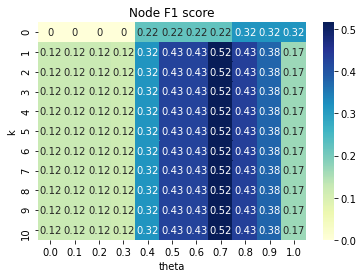

[Text(33.0, 0.5, 'k'),
 Text(0.5, 15.0, 'theta'),
 Text(0.5, 1.0, 'Edge F1 score')]

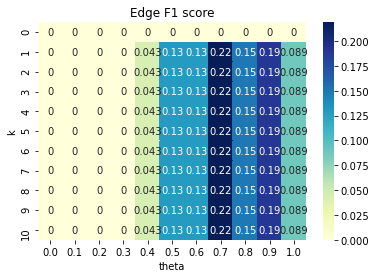

In [24]:
# score_d
# for i in score_d:
#     print(i, [round(j,2) for j in score_d[i]])
x_axis_labels = [round(i*0.1,2) for i in range(11)]
n_f1_m[0,0] = e_f1_m[0,0] = 0
ax = sns.heatmap(n_f1_m,cmap='YlGnBu',xticklabels=x_axis_labels,annot=True)
ax.set(title="Node F1 score",
      xlabel="theta",
      ylabel='k',)
plt.show()
ax2 = sns.heatmap(e_f1_m,cmap='YlGnBu',xticklabels=x_axis_labels,annot=True)
ax2.set(title="Edge F1 score",
      xlabel="theta",
      ylabel='k')

In [228]:
for i,nt in enumerate(topo_sck1.nodetypeset):
    print(i)
    nt.print(True)
# len(sc_gt.nodetypeset), len(sc_gt.edgetypeset)
# topo_sck1.nodetypeset[2].print(True)
# sc_gt.nodetypeset[10].print(True)
# topo_sck1.computeF1score(sc_gt,CONSIDER_EDGES=True,WEIGHTED=True,CONSIDER_EDGES_OF_SRC_TAR=False, ANALYSE_MODE=True)

0
------------Content Type----------------
name     str            
url      str            
id       int            
incoming edges
{'STUDY_AT': {<class 'ElementType.LBL'>}, 'classYear': {<class 'int'>}}
{'HAS_INTEREST': {<class 'ElementType.LBL'>}, 'IS_LOCATED_IN': {<class 'ElementType.LBL'>}}
{'WORK_AT': {<class 'ElementType.LBL'>}, 'workFrom': {<class 'int'>}}
{'HAS_TAG': {<class 'ElementType.LBL'>}, 'IS_LOCATED_IN': {<class 'ElementType.LBL'>}}
{'HAS_TAG': {<class 'ElementType.LBL'>}}
{'HAS_TYPE': {<class 'ElementType.LBL'>}, 'IS_LOCATED_IN': {<class 'ElementType.LBL'>}, 'IS_PART_OF': {<class 'ElementType.LBL'>}, 'IS_SUBCLASS_OF': {<class 'ElementType.LBL'>}}
outgoing  edges
{'HAS_TYPE': {<class 'ElementType.LBL'>}, 'IS_LOCATED_IN': {<class 'ElementType.LBL'>}, 'IS_PART_OF': {<class 'ElementType.LBL'>}, 'IS_SUBCLASS_OF': {<class 'ElementType.LBL'>}}
1
------------Content Type----------------
creationDate int            
firstName str            
lastName str            
gender   s

In [149]:
for i,nt in enumerate(topo_sck1.nodetypeset):
    print(i)
    nt.print(True)

0
------------Content Type----------------
name     str            
url      str            
Place    LBL            
id       int            
incoming edges
{'IS_LOCATED_IN': {<class 'ElementType.LBL'>}}
{'IS_PART_OF': {<class 'ElementType.LBL'>}}
outgoing  edges
{'IS_PART_OF': {<class 'ElementType.LBL'>}}
1
------------Content Type----------------
name     str            
url      str            
Place    LBL            
id       int            
incoming edges
{'IS_LOCATED_IN': {<class 'ElementType.LBL'>}}
{'IS_PART_OF': {<class 'ElementType.LBL'>}}
outgoing  edges
2
------------Content Type----------------
name     str            
url      str            
Place    LBL            
id       int            
index    int            
incoming edges
outgoing  edges
3
------------Content Type----------------
name     str            
url      str            
Organisation LBL            
id       int            
incoming edges
{'STUDY_AT': {<class 'ElementType.LBL'>}, 'classYear': {<class 'i

In [91]:
# topo_sck1.computeF1score(sc_gt,CONSIDER_EDGES=False,WEIGHTED=False,CONSIDER_EDGES_OF_SRC_TAR=False,ANALYSE_MODE=False)
# sc_gen.computeF1score(sc_gt,CONSIDER_EDGES=False,WEIGHTED=False,CONSIDER_EDGES_OF_SRC_TAR=False,ANALYSE_MODE=False)
topo_sck1.computeF1score(sc_gt,CONSIDER_EDGES=True,WEIGHTED=True,CONSIDER_EDGES_OF_SRC_TAR=False,ANALYSE_MODE=True)

computing node f1 score ignoredatatype False consider edges True
FALSE POSITIVE
------------Content Type----------------
name     str            
url      str            
id       int            
incoming edges
{'HAS_INTEREST': {<class 'ElementType.LBL'>}, 'IS_LOCATED_IN': {<class 'ElementType.LBL'>}}
{'HAS_MODERATOR': {<class 'ElementType.LBL'>}}
{'HAS_TAG': {<class 'ElementType.LBL'>}, 'IS_LOCATED_IN': {<class 'ElementType.LBL'>}}
outgoing  edges
{'HAS_TAG': {<class 'ElementType.LBL'>}, 'IS_LOCATED_IN': {<class 'ElementType.LBL'>}}
FALSE POSITIVE
------------Content Type----------------
name     str            
url      str            
id       int            
incoming edges
{'HAS_INTEREST': {<class 'ElementType.LBL'>}, 'IS_LOCATED_IN': {<class 'ElementType.LBL'>}}
{'HAS_MODERATOR': {<class 'ElementType.LBL'>}}
{'HAS_TAG': {<class 'ElementType.LBL'>}, 'IS_LOCATED_IN': {<class 'ElementType.LBL'>}}
outgoing  edges
FALSE POSITIVE
------------Content Type----------------
name     str    

In [99]:
# for et in testsc.edgetypeset:
#     print(et.attributes)
#     et.src_type.print(True)
#     et.print()
#     et.print()
for i,nt in enumerate(testsc.nodetypeset):
    print(i)
    nt.print(True)
# len(testsc.nodetypeset),len(node_partitions)

0
------------Content Type----------------
name     str            
url      str            
Place    LBL            
id       int            
index    int            
incoming edges
{'HAS_TYPE': {<class 'ElementType.LBL'>}}
{'HAS_TAG': {<class 'ElementType.LBL'>}}
outgoing  edges
{'HAS_TYPE': {<class 'ElementType.LBL'>}}
1
------------Content Type----------------
name     str            
url      str            
Place    LBL            
id       int            
index    int            
incoming edges
{'HAS_TYPE': {<class 'ElementType.LBL'>}}
{'HAS_TAG': {<class 'ElementType.LBL'>}}
outgoing  edges
2
------------Content Type----------------
name     str            
url      str            
Place    LBL            
id       int            
index    int            
incoming edges
outgoing  edges
3
------------Content Type----------------
name     str            
url      str            
Organisation LBL            
id       int            
index    int            
incoming edges
{'IS_LOC

In [17]:
nw_sc = get_gt_northwind()
G, node2partition, edge2partition, node_partitions, \
    edge_partitions, node_partition_sim, edge_partition_sim,sc_gen =  \
                    generateGraphFromSchema(nw_sc,rand_s=100,rand_t=150, edge_num=5)
print('Graph #nodes',len(G.nodes),' #edges',len(G.edges))
node_partitions, edge_partitions, node_partition_sim, edge_partition_sim = \
                    topoPartitionBased(G, 1,[0.2], node_partitions, edge_partitions, 
                                       node_partition_sim, edge_partition_sim, node2partition, edge2partition)
node2partition,edge_partitions = getObject2PartitionDict(node_partitions), getObject2PartitionDict(edge_partitions)
topo_sck1 = getSchemaFromPartition(G, node2partition,edge_partitions)
remove_attr(topo_sck1)
topo_sck1.computeF1score(sc_gen)
# computeGEDscore(sc, topo_sck1)

1623it [00:00, 40583.99it/s]
2243it [00:00, 21757.48it/s]

rand_s 100 rand_t 150


4201it [00:00, 14328.81it/s]
100%|██████████| 13/13 [00:04<00:00,  2.69it/s]


computing node f1 score ignoredatatype False consider edges True
27 0 0
precision:  1.0
recall:  1.0
f1_score:  1.0
13 0 0
precision:  1.0
recall:  1.0
f1_score:  1.0


In [11]:
sc = snb_gt_LT()
G, node2partition, edge2partition, node_partitions, \
    edge_partitions, node_partition_sim, edge_partition_sim,sc_gen =  \
                    generateGraphFromSchema(sc,rand_s=100,rand_t=150, edge_num=5)
# computeGEDscore(sc, sc_gen)
sc_gen.computeF1score(sc)
# len(G.nodes), len(G.edges)

1761it [00:00, 85635.75it/s]
1849it [00:00, 18316.86it/s]

rand_s 100 rand_t 150


6201it [00:00, 8955.64it/s] 

computing node f1 score ignoredatatype False consider edges True
2 12 7
precision:  0.2222222222222222
recall:  0.14285714285714285
f1_score:  0.17391304347826086
18 0 0
precision:  1.0
recall:  1.0
f1_score:  1.0


In [52]:
for e in G.edges(data=True):
    attr = e[2]
    if 'HAS_MEMBER' in attr and 'HAS_MODERATOR' in attr:
        print(e)

In [12]:
node_partitions, edge_partitions, node_partition_sim, edge_partition_sim = \
                    topoPartitionBased(G, 2,[0.2,0.1], node_partitions, edge_partitions, 
                                       node_partition_sim, edge_partition_sim, node2partition, edge2partition)
node2partition,edge_partitions = getObject2PartitionDict(node_partitions), getObject2PartitionDict(edge_partitions)
topo_sck1 = getSchemaFromPartition(G, node2partition,edge_partitions)
remove_attr(topo_sck1)
topo_sck1.computeF1score(sc)
# computeGEDscore(sc, topo_sck1)

100%|██████████| 18/18 [00:07<00:00,  2.31it/s]


computing node f1 score ignoredatatype False consider edges True
9 12 12
precision:  0.42857142857142855
recall:  0.42857142857142855
f1_score:  0.42857142857142855
18 0 0
precision:  1.0
recall:  1.0
f1_score:  1.0


In [9]:
topo_sck1.computeF1score(sc)

computing node f1 score ignoredatatype False consider edges True
9 12 12
precision:  0.42857142857142855
recall:  0.42857142857142855
f1_score:  0.42857142857142855
18 0 0
precision:  1.0
recall:  1.0
f1_score:  1.0


In [60]:
[e for e in G.in_edges(298,keys=True)]
# edge2partition


[(782, 298, 0),
 (1394, 298, 0),
 (1479, 298, 0),
 (144, 298, 0),
 (144, 298, 1),
 (236, 298, 0)]

In [5]:
topo_sck1 = getSchemaFromPartition(G, node2partition,edge_partitions)
remove_attr(topo_sck1)
topo_sck1.computeF1score(sc)

ValueError: not enough values to unpack (expected 3, got 2)

In [5]:
for e in G.edges(data=True):
    attr = e[2]
    if 'HAS_MEMBER' in attr and 'HAS_MODERATOR' in attr:
        print(e)

In [9]:
# G = get_taxonomy_data()
# topo_sck1.edgetypeset.print()
for et in topo_sck1.edgetypeset.edgetypes:
    found = 0
    for gt_et in sc.edgetypeset.edgetypes:
        if et.equal(gt_et,CONSIDER_EDGES=False):
            found = 1
    if found==0:
        et.print()

In [78]:
len(sc.nodetypeset),len(sc.edgetypeset),\
len(topo_sck1.nodetypeset), len(topo_sck1.edgetypeset)

(14, 20, 13, 18)

In [74]:
# len(topo_sck1.nodetypeset),len(topo_sck1.edgetypeset)
# len(node_partitions)
# node_partitions[0]

In [24]:
# for i in up_partitions:
#     for p in up_partitions[i]:
#         print(len(p))
#     print(len(up_partitions[i]))
def topoSimPartition(p1,p2):
    inc_nbr = {} # map to count
    out_nbr = set()
    for obj in p1:
        inc_nbr.add(inc(obj))
        out_nbr.add(out(obj))
    for obj in p2:
        #same
        pass
    # jaccard bbased on wegihted (weight by frequency)
    
    

In [71]:
# for n in node_partitions[1]: 
#     print(set([edge2partition[i] for i in G.in_edges(n)]))
#     print(set([edge2partition[i] for i in G.out_edges(n)]))
#     print(G.out_edges(n))
#TODO TODO  the problem is setting the parameter, how much edges missing can be tolerated

In [195]:
# len(new_node_partition_sim)new_node_partition_sim
# new_node_partition_sim
# sim_matrix

In [100]:
# partitions, partition_similarity = \
#         update_partitions(new_partitions_list, new_part_sim_list, node_partitions, node_partition_sim)len
# node_partitions
# partition_similarity
# len(new_node_partitions)
cnt = {}
for i in sim_matrix:
    for j in i:
        if not j in cnt:
            cnt[j] = 0
        cnt[j]+=1

In [18]:
# sc = pickle.load(open('stored_schema/schema_snb-1_all_nodes_rels_ground_truth.pickle','rb',-1))
import pickle
mb6_gt_sc = pickle.load(open('stored_schema/schema_mb6_ground_truth.pickle','rb',-1))
sc = mb6_gt_sc
# sc = snb_gt_sc
random.seed(19)
generated_nodes = {nt:[] for nt in sc.nodetypeset.nodetypes}
generated_edges = {et:[] for et in sc.edgetypeset.edgetypes}
nodes = []
edges = []
rand_s, rand_t = 500, 1000
for nt in sc.nodetypeset.nodetypes:
    for i in range(random.randint(rand_s,rand_t)):
        node = generateRandomNodes(nt)
        node['index'] = len(nodes)
        generated_nodes[nt].append(node)
        nodes.append(node)

incoming_edges = {i:[] for i in range(len(nodes))}
outgoing_edges = {i:[] for i in range(len(nodes))}
for et in sc.edgetypeset.edgetypes:
#     for i in range(random.randint(rand_s,rand_t)):
    edge_list = generateEdgesForAllNodes(et,generated_nodes,incoming_edges,outgoing_edges)
    generated_edges[et] += edge_list
nodes_list = []
edges_list = []
for k in generated_nodes:
    nodes_list += generated_nodes[k]
for k in generated_edges:
    edges_list += generated_edges[k]

In [50]:
for n in nodes:
    rm = []
    for k in n:
        if type(n[k])==LBL:
            rm.append(k)
    for i in rm:
        del n[i]

In [111]:
sc_gen = Schema()
# node_dict_list = {'node_list':nodes_list, 'incoming_edges':incoming_edges, 'outgoing_edges':outgoing_edges}
sc_gen.extractSchema(node_dict_list=nodes_list,edge_dict_list=edges_list)
# gt_sc = pickle.load(open('stored_schema/schema_snb-1_all_nodes_rels_ground_truth.pickle','rb',-1))
# sc_gen.computeF1score(sc_topo)
remove_attr(sc_gen,'index')
sc_gen.computeF1score(sc)

3227it [00:00, 49647.02it/s]
21007it [00:00, 25371.14it/s]

Schema extraction time 0.9009950160980225
4 0 0
precision:  1.0
recall:  1.0
f1_score:  1.0
5 0 0
precision:  1.0
recall:  1.0
f1_score:  1.0


In [117]:
sc = pickle.load(open('snb_gt_topological.pkl','rb',-1))
sc_gen.computeF1score(sc,False)

In [6]:
#extract from 
# return a map from nodes to node type
# for each edge
extracted_sc_mb6 = Schema()
node2nt = {}
for n in nodes_list:
#     n = preprocessPy2neoNode(n)
    nt_ind = extracted_sc_mb6.nodetypeset.addWithEdges(n,incoming_edges[n['index']], outgoing_edges[n['index']])
    node2nt[n['index']] = nt_ind 
for e in edges_list:
    e.nodes[0] = extracted_sc_mb6.node_types[node2nt[e.nodes[0]['index']]]
    e.nodes[1] = extracted_sc_mb6.node_types[node2nt[e.nodes[1]['index']]]
    extracted_sc_mb6.edgetypeset.add(e)

In [88]:
# sc_topo = pickle.load(open('snb_gt_topological.pkl','rb',-1))
# extracted_sc.computeF1score(sc_topo,igoreDatatype=False)
extracted_sc.computeF1score(sc_gt_withNodeEdgeProfile,igoreDatatype=False)

10 4 17
precision:  0.37037037037037035
recall:  0.7142857142857143
f1_score:  0.4878048780487805
7 13 13
precision:  0.35
recall:  0.35
f1_score:  0.35


In [4]:
# for nt in extracted_sc.node_types:
#     del nt.attributes['index']
# extracted_sc.computeF1score(sc)
extracted_sc.print()

In [36]:
nl, el = generateFromSchema(nw_gt_sc)
sc_gen = Schema()
sc_gen.extractSchema(node_dict_list=nl,edge_dict_list=el,IGNORE_LABEL=False,mode='TOPO')
remove_attr(sc_gen)
with open('nowtihwind_sc_gen_NotIgnoreLabel.pkl','wb') as f:
    pickle.dump(sc_gen, f, -1)

9512it [00:01, 5453.97it/s] 
58244it [00:03, 15438.53it/s]

Schema extraction time 5.523648262023926


In [48]:
sc_gen = pickle.load(open('nowtihwind_sc_gen_NotIgnoreLabel.pkl','rb'))
sc_gen.mergeByTopology()
sc_gen.computeF1score(nw_gt_sc,igoreDatatype=False)
sc_gen = pickle.load(open('nowtihwind_sc_gen_NotIgnoreLabel.pkl','rb'))
sc_gen.mergeByPropertiesSet()
sc_gen.computeF1score(nw_gt_sc,igoreDatatype=False)
sc_gen = pickle.load(open('nowtihwind_sc_gen_NotIgnoreLabel.pkl','rb'))
sc_gen.mergeByLabelsSet(IGNORE_SRC_TAR=True)
sc_gen.computeF1score(nw_gt_sc,igoreDatatype=False)
sc_gen = pickle.load(open('nowtihwind_sc_gen_NotIgnoreLabel.pkl','rb'))
sc_gen.mergeByPropertyAndTopology()
sc_gen.computeF1score(nw_gt_sc,igoreDatatype=False)

In [3]:
def generateGraphFromSchema(gt_sc,l=0.4,p=0.4,**kwargs):
    nl, el = generateFromSchema(gt_sc,**kwargs)
    sc_gen = Schema()
    n_part, e_part = sc_gen.extractSchema(node_dict_list=nl,edge_dict_list=el,IGNORE_LABEL=False)
    remove_attr(sc_gen)
    edge_partition_sim = getElemTypeSimilarityDict(sc_gen.edgetypeset.edgetypes,l,p)
    node_partition_sim = getElemTypeSimilarityDict(sc_gen.nodetypeset.nodetypes,l,p)
    
    G = nx.DiGraph()
    nl_tup = [(i['index'],i) for i in nl['node_list']]
    el_tup = [(i.nodes[0]['index'], i.nodes[1]['index'],i) for i in el]
    G.add_nodes_from(nl_tup)
    G.add_edges_from(el_tup)
    
    node2partition = {}
    edge2partition = {}
    for n in nl['node_list']:
        node2partition[n['index']] = n_part[n['index']]
    for ind,e in enumerate(el_tup):
        edge2partition[(e[0],e[1])] = e_part[ind]
    
    node_partitions = {} # map partition number to a list of nodes that belong to the partition
    edge_partitions = {}
    for node in node2partition:
        partition_num = node2partition[node]
        if not partition_num in node_partitions:
            node_partitions[partition_num] = []
        node_partitions[partition_num].append(node)
  
    for edge in edge2partition:
        partition_num = edge2partition[edge]
        if not partition_num in edge_partitions:
            edge_partitions[partition_num] = []
        edge_partitions[partition_num].append(edge)
    # TODO remove attribute 'index' from each node
    
    return G, node2partition, edge2partition, node_partitions,\
            edge_partitions, node_partition_sim, edge_partition_sim, sc_gen

In [292]:
# for nt in sc_gen.nodetypeset.nodetypes:
#     nt.print() # TODO check why the place type is not being pratitioned
# len(sc.nodetypeset.nodetypes)
# len(sc_gen.nodetypeset)
# sc_gen.nodetypeset.print()
# sc_gen.nodetypeset.print()

In [2]:
snb_gt_sc = get_gt_northwind()
nl, el = generateFromSchema(snb_gt_sc)
sc_gen = Schema()
n_part, e_part = sc_gen.extractSchema(node_dict_list=nl,edge_dict_list=el,IGNORE_LABEL=False)
remove_attr(sc_gen)

9512it [00:00, 59457.94it/s]
58244it [00:04, 14452.61it/s]


In [10]:
# sc = get_snb_with_incEdgesAndOutEdges()
# nt = sc.nodetypeset.nodetypes[0]

In [6]:
G = nx.DiGraph()
nl_tup = [(i['index'],i) for i in nl['node_list']]
el_tup = [(i.nodes[0]['index'], i.nodes[1]['index'],i) for i in el]
G.add_nodes_from(nl_tup)
G.add_edges_from(el_tup)

In [13]:
node_partition = node2partition = {}
edge_partition = edge2partition = {}
for n in nl['node_list']:
    node_partition[n['index']] = n_part[n['index']]
for ind,e in enumerate(el_tup):
    edge_partition[(e[0],e[1])] = e_part[ind]

In [8]:
node_partition, edge_partition, npart_map, epart_map = topo_based(G,k =1)
                    #,node_partition=node_partition,edge_partition=edge_partition)

In [21]:
# np.unique(edge_partition)
# edge_partition
# np.unique([edge_partition[i] for i in edge_partition])

In [13]:
# G.nodes[0]
# nt.mergeWithAnotherType
sc = getSchemaFromPartitionWithEdges(G, node_partition, edge_partition)

In [17]:
gt_sc = get_taxonomy()
sc.computeF1score(gt_sc,CONSIDER_EDGES=True,igoreDatatype=False)

computing node f1 score ignoredatatype False consider edges True
3 0 0
precision:  1.0
recall:  1.0
f1_score:  1.0
4 0 0
precision:  1.0
recall:  1.0
f1_score:  1.0


In [21]:
for nt in sc.nodetypeset.nodetypes:
    print(nt.incoming_edges, nt.outgoing_edges)

set() {<ElementType.ContentType object at 0x1048BF30>}
{<ElementType.ContentType object at 0x1048BF50>} set()
{<ElementType.ContentType object at 0x1048BCB0>} {<ElementType.ContentType object at 0x1048BC90>}


In [25]:
remove_attr(sc)
sc.computeF1score(gt_sc=snb_gt_sc,igoreDatatype=True,CONSIDER_EDGES_OF_SRC_TAR=True)

computing node f1 score ignoredatatype True consider edges True
31 3 9
precision:  0.775
recall:  0.9117647058823529
f1_score:  0.8378378378378379
96 4 100
precision:  0.4897959183673469
recall:  0.96
f1_score:  0.6486486486486486


In [42]:
sc = Schema()
type_to_nodes = {}  # partition: [list of node]
type_to_edges = {}  # partition:[list of edge]
partition_to_type = {}  # for node, partition_num: NodeType
for n in node_partition:
    if not node_partition[n] in type_to_nodes:
        type_to_nodes[node_partition[n]] = []
    type_to_nodes[node_partition[n]].append(n)

for e in edge_partition:
    if not edge_partition[e] in type_to_edges:
        type_to_edges[edge_partition[e]] = []
    type_to_edges[edge_partition[e]].append(e)

In [46]:
for t in type_to_nodes:
    nt = NodeType(elem=G.nodes[type_to_nodes[t][0]])
    for n in type_to_nodes[t]:
        nt2 = NodeType(elem=G.nodes[n])
        nt.mergeWithAnotherType(nt2)
    sc.nodetypeset.nodetypes.append(nt)
    sc.nodetypeset.numOfType.append(1)
    partition_to_type[t] = nt

In [50]:
for t in type_to_edges:
    src, tar = type_to_edges[t][0][0], type_to_edges[t][0][1]

    st = partition_to_type[node_partition[src]]
    tart = partition_to_type[node_partition[tar]]

    et = EdgeType(src_type=st, target_type=tart, relation_type=G.edges[src, tar])
    for e in type_to_edges[t]:
        src, tar = e[0], e[1]
        st = partition_to_type[node_partition[src]]
        tart = partition_to_type[node_partition[tar]]
        et2 = EdgeType(src_type=st, target_type=tart, relation_type=G.edges[src, tar])
        et.mergeWithAnotherType(et2)
    sc.edgetypeset.edgetypes.append(et)
    sc.edgetypeset.numOfType.append(1)

In [64]:
sc.computeF1score(snb_gt_sc,CONSIDER_EDGES=True,igoreDatatype=False)

computing node f1 score ignoredatatype False consider edges True
177 12 9
precision:  0.9516129032258065
recall:  0.9365079365079365
f1_score:  0.944
54910 1 444
precision:  0.9919788994471944
recall:  0.9999817887126441
f1_score:  0.9959642679000589


In [3]:
sc_gen = pickle.load(open('snb_gen_1w_removeSubtypeLabel.pkl','rb'))
sc_gen.mergeByTopology()
sc_gen.computeF1score(snb_gt_sc,igoreDatatype=False,CONSIDER_EDGES=True)

# sc_gen = pickle.load(open('snb_gen_1w_removeSubtypeLabel.pkl','rb'))
# sc_gen.mergeByPropertiesSet()
# sc_gen.computeF1score(snb_gt_sc,igoreDatatype=False)
sc_gen = pickle.load(open('snb_gen_1w_removeSubtypeLabel.pkl','rb'))
sc_gen.mergeByLabelsSet(IGNORE_SRC_TAR=True)
sc_gen.computeF1score(snb_gt_sc,igoreDatatype=False,CONSIDER_EDGES=True)
print(len(sc_gen.nodetypeset))

16 clusters found out of 18 edges
0 14 4
precision:  0.0
recall:  0.0
f1_score:  0
14 4 2
precision:  0.875
recall:  0.7777777777777778
f1_score:  0.823529411764706
4 10 5
precision:  0.4444444444444444
recall:  0.2857142857142857
f1_score:  0.34782608695652173
13 6 2
precision:  0.8666666666666667
recall:  0.6842105263157895
f1_score:  0.7647058823529413
9


In [17]:
sc_org = pickle.load(open('snb_gen_1w_removeSubtypeLabel.pkl','rb'))

In [9]:
nl, el = generateFromSchema(sc_gt_pt)
sc_gen = Schema()
sc_gen.extractSchema(node_dict_list=nl,edge_dict_list=el,IGNORE_LABEL=False,mode='TOPO')
remove_attr(sc_gen, 'index')
with open('snb_gen_1w_removeAllLabel.pkl','wb') as f:
    pickle.dump(sc_gen, f, -1)

10087it [00:07, 1304.75it/s]
289448it [00:28, 10031.67it/s]

Schema extraction time 36.64137268066406


In [3]:

sc_gen = pickle.load(open('snb_gen_1w_removeAllLabel.pkl','rb'))
sc_gen.mergeByTopology()
sc_gen.computeF1score(snb_gt_sc,igoreDatatype=False,CONSIDER_EDGES=True)

sc_gen = pickle.load(open('snb_gen_1w_removeAllLabel.pkl','rb'))
sc_gen.mergeByPropertiesSet()
sc_gen.computeF1score(snb_gt_sc,igoreDatatype=False)

sc_gen = pickle.load(open('snb_gen_1w_removeAllLabel.pkl','rb'))
sc_gen.mergeByPropertyAndTopology()
sc_gen.computeF1score(snb_gt_sc,igoreDatatype=False)
# sc_gen = pickle.load(open('snb_gen_1w_removeAllLabel.pkl','rb'))
# sc_gen.mergeByLabelsSet(IGNORE_SRC_TAR=True)
# sc_gen.computeF1score(snb_gt_sc,igoreDatatype=False,CONSIDER_EDGES=True)
# print(len(sc_gen.nodetypeset))

10 clusters found out of 18 edges
1 13 44
precision:  0.022222222222222223
recall:  0.07142857142857142
f1_score:  0.03389830508474576
6 14 4
precision:  0.6
recall:  0.3
f1_score:  0.4
1 13 4
precision:  0.2
recall:  0.07142857142857142
f1_score:  0.10526315789473682
3 17 2
precision:  0.6
recall:  0.15
f1_score:  0.24
0 1 inc sim:  1.0 out sim: 1.0
0 1 property sim:  2.0
0 2 inc sim:  0.8333333333333334 out sim: 1.0
0 2 property sim:  1.9166666666666667
0 3 inc sim:  0.8333333333333334 out sim: 1.0
0 3 property sim:  1.9166666666666667
0 4 inc sim:  0.8333333333333334 out sim: 1.0
0 4 property sim:  1.9166666666666667
0 5 inc sim:  0.6666666666666666 out sim: 1.0
0 5 property sim:  1.8333333333333333
0 6 inc sim:  0.8333333333333334 out sim: 1.0
0 6 property sim:  1.9166666666666667
0 7 inc sim:  1.0 out sim: 1.0
0 7 property sim:  2.0
0 8 inc sim:  1.0 out sim: 1.0
0 8 property sim:  2.0
0 9 inc sim:  0.6666666666666666 out sim: 1.0
0 9 property sim:  1.8333333333333333
0 10 inc sim

3 7 property sim:  2.0
3 8 inc sim:  1.0 out sim: 1.0
3 8 property sim:  2.0
3 9 inc sim:  0.8 out sim: 1.0
3 9 property sim:  1.9
3 10 inc sim:  0.8 out sim: 1.0
3 10 property sim:  1.9
3 11 inc sim:  1.0 out sim: 1.0
3 11 property sim:  2.0
3 12 inc sim:  0.8 out sim: 1.0
3 12 property sim:  1.9
3 13 inc sim:  0.8 out sim: 1.0
3 13 property sim:  1.9
3 14 inc sim:  0.8 out sim: 1.0
3 14 property sim:  1.9
3 15 inc sim:  0.8 out sim: 1.0
3 15 property sim:  1.9
3 16 inc sim:  0.6 out sim: 1.0
3 16 property sim:  1.8
3 17 inc sim:  0.8 out sim: 1.0
3 17 property sim:  1.9
3 18 inc sim:  0.6 out sim: 1.0
3 18 property sim:  1.8
3 19 inc sim:  0.8 out sim: 1.0
3 19 property sim:  1.9
3 20 inc sim:  0.8 out sim: 1.0
3 20 property sim:  1.9
3 21 inc sim:  0.8 out sim: 1.0
3 21 property sim:  1.9
3 22 inc sim:  0.6 out sim: 1.0
3 22 property sim:  1.8
3 23 inc sim:  0.8 out sim: 1.0
3 23 property sim:  1.9
3 24 inc sim:  0.8 out sim: 1.0
3 24 property sim:  1.9
3 25 inc sim:  0.6 out sim: 1

7 31 inc sim:  0.8571428571428571 out sim: 1.0
7 31 property sim:  1.9285714285714286
7 32 inc sim:  0.7142857142857143 out sim: 1.0
7 32 property sim:  1.8571428571428572
7 33 inc sim:  0.8571428571428571 out sim: 1.0
7 33 property sim:  1.9285714285714286
7 34 inc sim:  0.7142857142857143 out sim: 1.0
7 34 property sim:  1.8571428571428572
7 35 inc sim:  0.7142857142857143 out sim: 1.0
7 35 property sim:  1.8571428571428572
7 36 inc sim:  0.7142857142857143 out sim: 1.0
7 36 property sim:  1.8571428571428572
7 37 inc sim:  0.0 out sim: 0.25
7 37 property sim:  0.20833333333333331
7 38 inc sim:  0.0 out sim: 0.25
7 38 property sim:  0.20833333333333331
7 39 inc sim:  0 out sim: 0.0
7 39 property sim:  0.2
7 40 inc sim:  0.0 out sim: 0.25
7 40 property sim:  0.25
7 41 inc sim:  0.0 out sim: 0.25
7 41 property sim:  0.25
7 42 inc sim:  0.0 out sim: 0.25
7 42 property sim:  0.25
7 43 inc sim:  0.0 out sim: 0
7 43 property sim:  0.1
7 44 inc sim:  0 out sim: 0
7 44 property sim:  0.1
8 9 

11 34 property sim:  1.8571428571428572
11 35 inc sim:  0.5714285714285714 out sim: 1.0
11 35 property sim:  1.7857142857142856
11 36 inc sim:  0.8571428571428571 out sim: 1.0
11 36 property sim:  1.9285714285714286
11 37 inc sim:  0.0 out sim: 0.25
11 37 property sim:  0.20833333333333331
11 38 inc sim:  0.0 out sim: 0.25
11 38 property sim:  0.20833333333333331
11 39 inc sim:  0 out sim: 0.0
11 39 property sim:  0.2
11 40 inc sim:  0.0 out sim: 0.25
11 40 property sim:  0.25
11 41 inc sim:  0.0 out sim: 0.25
11 41 property sim:  0.25
11 42 inc sim:  0.0 out sim: 0.25
11 42 property sim:  0.25
11 43 inc sim:  0.0 out sim: 0
11 43 property sim:  0.1
11 44 inc sim:  0 out sim: 0
11 44 property sim:  0.1
12 13 inc sim:  0.8 out sim: 1.0
12 13 property sim:  1.9
12 14 inc sim:  1.0 out sim: 1.0
12 14 property sim:  2.0
12 15 inc sim:  1.0 out sim: 1.0
12 15 property sim:  2.0
12 16 inc sim:  0.8 out sim: 1.0
12 16 property sim:  1.9
12 17 inc sim:  0.6 out sim: 1.0
12 17 property sim:  1.

16 25 inc sim:  1.0 out sim: 1.0
16 25 property sim:  2.0
16 26 inc sim:  0.5 out sim: 1.0
16 26 property sim:  1.75
16 27 inc sim:  0.75 out sim: 1.0
16 27 property sim:  1.875
16 28 inc sim:  0.5 out sim: 1.0
16 28 property sim:  1.75
16 29 inc sim:  0.75 out sim: 1.0
16 29 property sim:  1.875
16 30 inc sim:  0.75 out sim: 1.0
16 30 property sim:  1.875
16 31 inc sim:  1.0 out sim: 1.0
16 31 property sim:  2.0
16 32 inc sim:  0.75 out sim: 1.0
16 32 property sim:  1.875
16 33 inc sim:  0.75 out sim: 1.0
16 33 property sim:  1.875
16 34 inc sim:  0.5 out sim: 1.0
16 34 property sim:  1.75
16 35 inc sim:  0.75 out sim: 1.0
16 35 property sim:  1.875
16 36 inc sim:  0.5 out sim: 1.0
16 36 property sim:  1.75
16 37 inc sim:  0.0 out sim: 0.25
16 37 property sim:  0.20833333333333331
16 38 inc sim:  0.0 out sim: 0.25
16 38 property sim:  0.20833333333333331
16 39 inc sim:  0 out sim: 0.0
16 39 property sim:  0.2
16 40 inc sim:  0.0 out sim: 0.25
16 40 property sim:  0.25
16 41 inc sim:  

22 23 inc sim:  0.6666666666666666 out sim: 1.0
22 23 property sim:  1.8333333333333333
22 24 inc sim:  0.8333333333333334 out sim: 1.0
22 24 property sim:  1.9166666666666667
22 25 inc sim:  0.8333333333333334 out sim: 1.0
22 25 property sim:  1.9166666666666667
22 26 inc sim:  0.6666666666666666 out sim: 1.0
22 26 property sim:  1.8333333333333333
22 27 inc sim:  0.5 out sim: 1.0
22 27 property sim:  1.75
22 28 inc sim:  0.3333333333333333 out sim: 1.0
22 28 property sim:  1.6666666666666665
22 29 inc sim:  0.5 out sim: 1.0
22 29 property sim:  1.75
22 30 inc sim:  0.8333333333333334 out sim: 1.0
22 30 property sim:  1.9166666666666667
22 31 inc sim:  1.0 out sim: 1.0
22 31 property sim:  2.0
22 32 inc sim:  0.6666666666666666 out sim: 1.0
22 32 property sim:  1.8333333333333333
22 33 inc sim:  0.6666666666666666 out sim: 1.0
22 33 property sim:  1.8333333333333333
22 34 inc sim:  0.5 out sim: 1.0
22 34 property sim:  1.75
22 35 inc sim:  0.6666666666666666 out sim: 1.0
22 35 propert

30 43 inc sim:  0.0 out sim: 0
30 43 property sim:  0.1
30 44 inc sim:  0 out sim: 0
30 44 property sim:  0.1
31 32 inc sim:  0.7142857142857143 out sim: 1.0
31 32 property sim:  1.8571428571428572
31 33 inc sim:  0.7142857142857143 out sim: 1.0
31 33 property sim:  1.8571428571428572
31 34 inc sim:  0.5714285714285714 out sim: 1.0
31 34 property sim:  1.7857142857142856
31 35 inc sim:  0.5714285714285714 out sim: 1.0
31 35 property sim:  1.7857142857142856
31 36 inc sim:  0.7142857142857143 out sim: 1.0
31 36 property sim:  1.8571428571428572
31 37 inc sim:  0.0 out sim: 0.25
31 37 property sim:  0.20833333333333331
31 38 inc sim:  0.0 out sim: 0.25
31 38 property sim:  0.20833333333333331
31 39 inc sim:  0 out sim: 0.0
31 39 property sim:  0.2
31 40 inc sim:  0.0 out sim: 0.25
31 40 property sim:  0.25
31 41 inc sim:  0.0 out sim: 0.25
31 41 property sim:  0.25
31 42 inc sim:  0.0 out sim: 0.25
31 42 property sim:  0.25
31 43 inc sim:  0.0 out sim: 0
31 43 property sim:  0.1
31 44 in

x:\py3\lib\site-packages\scipy\sparse\compressed.py:282: SparseEfficiencyWarning: Comparing a sparse matrix with a scalar greater than zero using < is inefficient, try using >= instead.
  warn(bad_scalar_msg, SparseEfficiencyWarning)


In [28]:
ndl,el = generateFromSchema(sc,rand_s=100,rand_t=200)
# sc,generated_nodes, incoming_edges, outgoing_edges = generateFromSchema(sc)
# generated_nodes.keys()
# sc.print()
# for nt in sc.nodetypeset.nodetypes:
#     if not nt in generated_nodes:
#         nt.print()


In [23]:
# for nt in sc.nodetypeset.nodetypes:
#     find = 0
#     for k in generated_nodes:
#         if nt is k:
#             find += 1
#     if find!=1:
#         if nt in generated_nodes:
#             print(find,'but foind')
#         print(find)
len(generated_nodes),len(sc.nodetypeset.nodetypes)

(9, 14)

In [11]:
for nt in sc.nodetypeset.nodetypes:
    find = 0
    for k in generated_nodes:
        if nt is k:
            find += 1
    if find!=1:
        print(find)

0
0
0
0
0


In [37]:
et = sc.edgetypeset.edgetypes[0]

In [9]:
for et in sc.edgetypeset.edgetypes:
#     print('itearte et')
    equal_src = equal_tar = 0
    for nt in generated_nodes:
#         print('iterate nt')
        if nt is et.src_type :
            equal_src += 1
        if nt is et.target_type:
            equal_tar += 1
#     if equal_src!=1 or equal_tar!=1:
#         et.print()
    print(equal_src,equal_tar)

1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
0 0
1 0
1 0
0 0
0 0
0 0
1 1
1 1
1 1
1 1
1 0
1 0


In [32]:
# ndl['outgoing_edges']
ndl['incoming_edges'][3229]

[]

In [45]:
np.unique([len (ndl['incoming_edges'][i]) for i in ndl['incoming_edges']],return_counts=True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39]),
 array([3196,   57,  152,  337,  429,  502,  497,  464,  456,  451,  449,
         403,  337,  305,  274,  264,  191,  190,  147,  140,  109,  106,
         109,   93,   80,   71,   63,   52,   41,   39,   25,   22,   16,
           4,    5,    5,    2,    2,    1,    1]))